# Töö uue andmestikuga

**NB! andmestiku peab manuaalselt alla tõmbamba kuna githubi limiit on 100 MB**
https://www.kaggle.com/datasets/yuanyuwendymu/airline-delay-and-cancellation-data-2009-2018/data?select=2013.csv - 2013.csv

In [87]:
%pip install kagglehub

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\jaano\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [88]:
import kagglehub

#Download latest version
path = kagglehub.dataset_download("yuanyuwendymu/airline-delay-and-cancellation-data-2009-2018")

print("Path to dataset files:", path)

C:\Users\jaano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\jaano\.cache\kagglehub\datasets\yuanyuwendymu\airline-delay-and-cancellation-data-2009-2018\versions\1


In [89]:
%pip install pandas
%pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\jaano\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\jaano\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# Data formatting?

In [90]:
import pandas as pd
import numpy as np

df=pd.read_csv('2013.csv')

Let's start working with the 2013's data. Let's check at first which features it has by printing the one of the rows and then checking the dataset's dimensions.

In [ ]:
print(f"Dimensions of the dataset are: {np.shape(df)}")
print(df.loc[100]) # Let's check how row with index 100 looks like

FL_DATE                2013-01-01
OP_CARRIER                     VX
OP_CARRIER_FL_NUM             783
ORIGIN                        LAX
DEST                          SEA
CRS_DEP_TIME                 1235
DEP_TIME                   1235.0
DEP_DELAY                     0.0
TAXI_OUT                      9.0
WHEELS_OFF                 1244.0
WHEELS_ON                  1459.0
TAXI_IN                       8.0
CRS_ARR_TIME                 1515
ARR_TIME                   1507.0
ARR_DELAY                    -8.0
CANCELLED                     0.0
CANCELLATION_CODE             NaN
DIVERTED                      0.0
CRS_ELAPSED_TIME            160.0
ACTUAL_ELAPSED_TIME         152.0
AIR_TIME                    135.0
DISTANCE                    954.0
CARRIER_DELAY                 NaN
WEATHER_DELAY                 NaN
NAS_DELAY                     NaN
SECURITY_DELAY                NaN
LATE_AIRCRAFT_DELAY           NaN
Unnamed: 27                   NaN
Name: 100, dtype: object


We can also see that we have 6369482 rows and 28 columns in that dataset.

In [93]:
print(df.dtypes) # Let's check what the types of each column are and whether it is correct or not


FL_DATE                 object
OP_CARRIER              object
OP_CARRIER_FL_NUM        int64
ORIGIN                  object
DEST                    object
CRS_DEP_TIME             int64
DEP_TIME               float64
DEP_DELAY              float64
TAXI_OUT               float64
WHEELS_OFF             float64
WHEELS_ON              float64
TAXI_IN                float64
CRS_ARR_TIME             int64
ARR_TIME               float64
ARR_DELAY              float64
CANCELLED              float64
CANCELLATION_CODE       object
DIVERTED               float64
CRS_ELAPSED_TIME       float64
ACTUAL_ELAPSED_TIME    float64
AIR_TIME               float64
DISTANCE               float64
CARRIER_DELAY          float64
WEATHER_DELAY          float64
NAS_DELAY              float64
SECURITY_DELAY         float64
LATE_AIRCRAFT_DELAY    float64
Unnamed: 27            float64
dtype: object


After observing the meaning of each column and its values, it is important for us to change the way values are being formatted in the following columns: 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'CANCELLED', 'DIVERTED', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY' and 'LATE_AIRCRAFT_DELAY'. Also, 'Unnamed: 27' column is useless so we can remove it.

Let's note that if we use other datasets in the future for evaluation, we need to apply those changes there as well in similar fashion.

Many changes are similar: they require changing the type from float64 to int64.

Those columns are as they follow: 'DEP_DELAY', 'TAXI_OUT', 'TAXI_IN', 'ARR_DELAY', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'.

There are also some columns that should be binary: 'CANCELLED', 'DIVERTED'.

Some columns require more complicated transformations so they would be in time format, those ones are as they follow: 'CRS_DEP_TIME', 'DEP_TIME', 'WHEELS_OFF', 'WHEELS_ON', 'CRS_ARR_TIME', 'ARR_TIME'.

Let's apply those changes now.

In [94]:
df = df.drop(columns=['Unnamed: 27'], errors='ignore') # Removing the useless column

columns_to_int = [
    'DEP_DELAY', 'TAXI_OUT', 'TAXI_IN', 'ARR_DELAY',
    'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY',
    'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'
] # Selecting the columns that should be changed to int64
df[columns_to_int] = df[columns_to_int].astype('Int64') # Applying changes

binary_columns = [
    'CANCELLED',
    'DIVERTED'
] # Selecting the columns that should be changed to binary

df[binary_columns] = df[binary_columns].astype('Int64') # Applying changes

## Dealing with military time
Now, let's get to the tricky part. We currently have times mostly in 'HHMM' format but we should convert them to 'HH:MM' format. Let's define a function that should be able to convert the times into correct format.

In [280]:
def convert_to_time_format(value):
    if pd.isna(value):
        return pd.NaT
    value = int(value)  # In case it's stored as float
    hours = value // 100
    minutes = value % 100
    return f"{hours:02}:{minutes:02}"

Now, let's transform those columns by using this function.

In [96]:
time_columns = ['CRS_DEP_TIME', 'DEP_TIME', 'WHEELS_OFF', 'WHEELS_ON', 'CRS_ARR_TIME', 'ARR_TIME']
# Selecting the columns that should be transformed

for col in time_columns:
    df[col] = df[col].apply(convert_to_time_format) # Applying changes

Let's check if those changes were applied correctly.

In [281]:
print(df.dtypes)


FL_DATE                object
OP_CARRIER             object
OP_CARRIER_FL_NUM       int64
ORIGIN                 object
DEST                   object
CRS_DEP_TIME           object
DEP_TIME               object
DEP_DELAY               Int64
TAXI_OUT                Int64
WHEELS_OFF             object
WHEELS_ON              object
TAXI_IN                 Int64
CRS_ARR_TIME           object
ARR_TIME               object
ARR_DELAY               Int64
CANCELLED                bool
CANCELLATION_CODE      object
DIVERTED                 bool
CRS_ELAPSED_TIME        Int64
ACTUAL_ELAPSED_TIME     Int64
AIR_TIME                Int64
DISTANCE                Int64
CARRIER_DELAY           Int64
WEATHER_DELAY           Int64
NAS_DELAY               Int64
SECURITY_DELAY          Int64
LATE_AIRCRAFT_DELAY     Int64
dtype: object


Types are correct now.

In [98]:
print(df.loc[100])

FL_DATE                2013-01-01
OP_CARRIER                     VX
OP_CARRIER_FL_NUM             783
ORIGIN                        LAX
DEST                          SEA
CRS_DEP_TIME                12:35
DEP_TIME                    12:35
DEP_DELAY                       0
TAXI_OUT                        9
WHEELS_OFF                  12:44
WHEELS_ON                   14:59
TAXI_IN                         8
CRS_ARR_TIME                15:15
ARR_TIME                    15:07
ARR_DELAY                      -8
CANCELLED                       0
CANCELLATION_CODE             NaN
DIVERTED                        0
CRS_ELAPSED_TIME              160
ACTUAL_ELAPSED_TIME           152
AIR_TIME                      135
DISTANCE                      954
CARRIER_DELAY                <NA>
WEATHER_DELAY                <NA>
NAS_DELAY                    <NA>
SECURITY_DELAY               <NA>
LATE_AIRCRAFT_DELAY          <NA>
Name: 100, dtype: object


After taking a look at a row (with 100 index), it seems that we have managed to make appropriate transformations, which is important for further analysis.

Let's check which columns have missing values and handle them appropriately.

In [282]:
df.isnull().sum()

FL_DATE                      0
OP_CARRIER                   0
OP_CARRIER_FL_NUM            0
ORIGIN                       0
DEST                         0
CRS_DEP_TIME                 0
DEP_TIME                 91681
DEP_DELAY                91681
TAXI_OUT                 94903
WHEELS_OFF               94903
WHEELS_ON                98275
TAXI_IN                  98275
CRS_ARR_TIME                 0
ARR_TIME                 98275
ARR_DELAY               110172
CANCELLED                    0
CANCELLATION_CODE      6273470
DIVERTED                     0
CRS_ELAPSED_TIME             5
ACTUAL_ELAPSED_TIME     110172
AIR_TIME                110172
DISTANCE                     0
CARRIER_DELAY          5100205
WEATHER_DELAY          5100205
NAS_DELAY              5100205
SECURITY_DELAY         5100205
LATE_AIRCRAFT_DELAY    5100205
dtype: int64

## Discrepency in amount of missing values 
It's alarming that amount of missing values in WHEELS_OFF and WHEELS_ON isn't the same. Let's investigate.

In [302]:
# First filter for WHEELS_OFF not missing and WHEELS_ON missing
filtered_df = df[
    (df['WHEELS_OFF'].notna()) & 
    (df['WHEELS_ON'].isna())
]
print(f"Discrepency is present in : {np.shape(filtered_df)}")
# Additional filter for non-cancelled flights
filtered_df = filtered_df[
    (filtered_df['CANCELLED'] == False)
]
print(f"Discrepency after cancellations is present : {np.shape(filtered_df)}")

filtered_df = filtered_df[
    (filtered_df['DIVERTED'] == False)
]
print(f"Discrepency after diversions is present : {np.shape(filtered_df)}")

# Set display option to show all columns
pd.set_option('display.max_columns', None)

Discrepency is present in : (3372, 27)
Discrepency after cancellations is present : (2263, 27)
Discrepency after diversions is present : (0, 27)


The issue is that there is no data about the flight arriving. It is as if the plane has been in the air for years. Having such rows will not do us any good for analysis. Therefore, we will need to use an imputation strategy. The best strategy seems to be using list-wise deletion which means that the rows that have missing values in that column will not be included.

In [303]:

df_cleaned = df.copy()
#df_cleaned = df[~((df['WHEELS_OFF'].notna()) & (df['WHEELS_ON'].isna()))]



## Discrepency Of departure times and Wheels off
There is still an alarming thing that amount of missing values is not the same for 'DEP_TIME' and 'WHEELS_OFF'. Let's investigate.

In [304]:
df_cleaned[['DEP_TIME', 'WHEELS_OFF']].isnull().sum()

DEP_TIME      91681
WHEELS_OFF    94903
dtype: int64

In [305]:
# First filter
filtered_df = df_cleaned[df_cleaned['DEP_TIME'].notna() & df_cleaned['WHEELS_OFF'].isna()]
print(np.shape(filtered_df))

# Corrected second filter
filtered_df2 = filtered_df[(filtered_df['CANCELLED'] == True)]
print(np.shape(filtered_df2))

pd.set_option('display.max_columns', None)

print(filtered_df.head(3)) # Showing the first 3 rows of the filtered DataFrame

(3222, 27)
(3222, 27)
          FL_DATE OP_CARRIER  OP_CARRIER_FL_NUM ORIGIN DEST CRS_DEP_TIME  \
8998   2013-01-01         US                448    SLC  CLT        23:59   
15578  2013-01-02         9E               3863    MEM  ATL        07:15   
15893  2013-01-02         9E               4335    SAT  MEM        06:00   

      DEP_TIME  DEP_DELAY  TAXI_OUT WHEELS_OFF WHEELS_ON  TAXI_IN  \
8998     01:07         68      <NA>        NaT       NaT     <NA>   
15578    07:16          1      <NA>        NaT       NaT     <NA>   
15893    05:59         -1      <NA>        NaT       NaT     <NA>   

      CRS_ARR_TIME ARR_TIME  ARR_DELAY  CANCELLED CANCELLATION_CODE  DIVERTED  \
8998         05:32      NaT       <NA>       True                 A     False   
15578        09:39      NaT       <NA>       True                 A     False   
15893        07:49      NaT       <NA>       True                 A     False   

       CRS_ELAPSED_TIME  ACTUAL_ELAPSED_TIME  AIR_TIME  DISTANCE  \
899

It seems like there are cases where airplane has departed but has not touched off the ground. This would mean that airport has been driving on land for years which makes no sense. Let's use list-wise deletion once again to fix this. However all of these cases seem to be cancelled flights, meaning that this discrepency isn't that relevant: we consider cancelled flights seperately from others.

In [306]:
df_cleaned2 = df_cleaned.copy()
#df_cleaned2 = df_cleaned[~((df_cleaned['DEP_TIME'].notna()) & (df_cleaned['WHEELS_OFF'].isna()))]
df_cleaned2.isnull().sum()

FL_DATE                      0
OP_CARRIER                   0
OP_CARRIER_FL_NUM            0
ORIGIN                       0
DEST                         0
CRS_DEP_TIME                 0
DEP_TIME                 91681
DEP_DELAY                91681
TAXI_OUT                 94903
WHEELS_OFF               94903
WHEELS_ON                98275
TAXI_IN                  98275
CRS_ARR_TIME                 0
ARR_TIME                 98275
ARR_DELAY               110172
CANCELLED                    0
CANCELLATION_CODE      6273470
DIVERTED                     0
CRS_ELAPSED_TIME             5
ACTUAL_ELAPSED_TIME     110172
AIR_TIME                110172
DISTANCE                     0
CARRIER_DELAY          5100205
WEATHER_DELAY          5100205
NAS_DELAY              5100205
SECURITY_DELAY         5100205
LATE_AIRCRAFT_DELAY    5100205
dtype: int64

## Dealing with cancelled and diverted flights

We are not currently interested in these flights, we will consider them later, thus we shall filter them out :

In [314]:
# First filter out cancelled or diverted flights
non_cancelled_diverted = df_cleaned2[
    (df_cleaned2['CANCELLED'] == False) & 
    (df_cleaned2['DIVERTED'] == False)
]


### Dealing with two outliers
We can notice that there are 2 cases in which 'CRS_ELAPSED_TIME' had a missing value. However, it is possible to calculate it by using columns 'CRS_ARR_TIME' and 'CRS_DEP_TIME' which have no missing values.

In [ ]:
#print(df_cleaned2.iloc[1:5][['CRS_DEP_TIME', 'CRS_ARR_TIME', 'CRS_ELAPSED_TIME', 'CANCELLED', 'DIVERTED']])
missing_crs_elapsed_time = df_cleaned2[df_cleaned2['CRS_ELAPSED_TIME'].isna()]
print(missing_crs_elapsed_time[['ORIGIN','DEST','CRS_DEP_TIME', 'CRS_ARR_TIME', 'CRS_ELAPSED_TIME', 'CANCELLED', 'DIVERTED']])

#DENver = UTC(-7) 6 a.m.
#BNA Nashville, MDW Chicago = UTC(-6) 7 a.m.
#SNA   UTC(-8) 5 a.m.

        ORIGIN DEST CRS_DEP_TIME CRS_ARR_TIME  CRS_ELAPSED_TIME  CANCELLED  \
1060779    DEN  MDW        08:30        11:46              <NA>      False   
1060780    MDW  DEN        12:25        14:02              <NA>       True   
5389021    SNA  DEN        15:00        18:09              <NA>       True   
5768225    DEN  BNA        10:22        13:48              <NA>      False   
5768226    BNA  DEN        14:28        16:20              <NA>       True   

         DIVERTED  
1060779      True  
1060780     False  
5389021     False  
5768225      True  
5768226     False  


As we see, it is possible to calculate it but we would also need to consider timezone difference so let's check the whole rows.

There are five flights which lack the planned elapsed time, to calculate this, we need to consider the departure and arrival airports and their timezones, for example : Chicago and Nashville are in the same timezone and Denver is 1 hour behind them. This means that the first flight's 'CRS_ELAPSED_TIME' should be 97 + 60 = 157. In a similar manner, we calculate for the other four flights.

In [325]:
df_cleaned2.loc[df_cleaned2.index == 1060779, 'CRS_ELAPSED_TIME'] = 136  # DEN to  MDW
df_cleaned2.loc[df_cleaned2.index == 1060780, 'CRS_ELAPSED_TIME'] = 157  # MDW to DEN
df_cleaned2.loc[df_cleaned2.index == 5768226, 'CRS_ELAPSED_TIME'] = 172  # BNA to DEN
df_cleaned2.loc[df_cleaned2.index == 5389021, 'CRS_ELAPSED_TIME'] = 129  # SNA to DEN
df_cleaned2.loc[df_cleaned2.index == 5768225, 'CRS_ELAPSED_TIME'] = 146  # DEN to BNA

print(df_cleaned2.loc[[1060779,1060780, 5768226,5389021,5768225], ['CRS_DEP_TIME', 'CRS_ARR_TIME', 'CRS_ELAPSED_TIME']]) # Checking if the missing values have been filled

        CRS_DEP_TIME CRS_ARR_TIME  CRS_ELAPSED_TIME
1060779        08:30        11:46               136
1060780        12:25        14:02               157
5768226        14:28        16:20               172
5389021        15:00        18:09               129
5768225        10:22        13:48               146


This issue has now been resolved. Let's see if there are more problems within the data.

In [326]:
df_cleaned2.isnull().sum()

FL_DATE                      0
OP_CARRIER                   0
OP_CARRIER_FL_NUM            0
ORIGIN                       0
DEST                         0
CRS_DEP_TIME                 0
DEP_TIME                 91681
DEP_DELAY                91681
TAXI_OUT                 94903
WHEELS_OFF               94903
WHEELS_ON                98275
TAXI_IN                  98275
CRS_ARR_TIME                 0
ARR_TIME                 98275
ARR_DELAY               110172
CANCELLED                    0
CANCELLATION_CODE      6273470
DIVERTED                     0
CRS_ELAPSED_TIME             0
ACTUAL_ELAPSED_TIME     110172
AIR_TIME                110172
DISTANCE                     0
CARRIER_DELAY          5100205
WEATHER_DELAY          5100205
NAS_DELAY              5100205
SECURITY_DELAY         5100205
LATE_AIRCRAFT_DELAY    5100205
dtype: int64

There are still couple problems within our data. At first, amount of missing values in 'ARR_DELAY' is not equal to amount of missing values in 'ARR_TIME'. Let's investigate.

In [110]:
filtered_df = df_cleaned2[df_cleaned2['ARR_TIME'].notna() & df_cleaned2['ARR_DELAY'].isna()] # Filtering rows where ARR_TIME is not missing, and ARR_DELAY is missing

pd.set_option('display.max_columns', None)

print(filtered_df.head(10)) # Showing the first 10 rows of the filtered DataFrame

         FL_DATE OP_CARRIER  OP_CARRIER_FL_NUM ORIGIN DEST CRS_DEP_TIME  \
231   2013-01-01         WN                113    MCO  LAS        07:50   
846   2013-01-01         WN               3915    DEN  LAX        11:35   
3149  2013-01-01         EV               3806    EWR  STL        14:59   
3384  2013-01-01         EV               4333    EWR  TUL        19:30   
3614  2013-01-01         EV               4542    IAH  HSV        10:53   
3739  2013-01-01         EV               4627    CLE  DFW        12:13   
3845  2013-01-01         EV               4703    IAH  BRO        21:00   
4014  2013-01-01         EV               5425    ATL  CRW        12:06   
4394  2013-01-01         EV               6128    ORD  CRW        13:08   
4457  2013-01-01         EV               6066    DEN  ISN        10:23   

     DEP_TIME  DEP_DELAY  TAXI_OUT WHEELS_OFF WHEELS_ON  TAXI_IN CRS_ARR_TIME  \
231     07:56          6         6      08:02     10:51        4        10:10   
846     12:1

We can fix those missing values by calculating them. We need to do that for 'ARR_DELAY', 'ACTUAL_ELAPSED_TIME' and 'AIR_TIME'.

In [111]:
print(df_cleaned2.head(10))

      FL_DATE OP_CARRIER  OP_CARRIER_FL_NUM ORIGIN DEST CRS_DEP_TIME DEP_TIME  \
0  2013-01-01         VX                108    LAX  IAD        07:00    07:00   
1  2013-01-01         VX                114    LAX  IAD        22:05    22:04   
2  2013-01-01         VX                 11    JFK  SFO        07:30    07:29   
3  2013-01-01         VX                121    PHL  LAX        07:00    07:00   
4  2013-01-01         VX                124    LAX  PHL        11:00    11:04   
5  2013-01-01         VX                125    PHL  LAX        11:45    11:42   
6  2013-01-01         VX                126    LAX  PHL        15:45    15:44   
7  2013-01-01         VX                127    PHL  LAX        20:10    20:00   
8  2013-01-01         VX                 12    SFO  JFK        07:00    06:58   
9  2013-01-01         VX                130    LAX  PHL        21:40    21:39   

   DEP_DELAY  TAXI_OUT WHEELS_OFF WHEELS_ON  TAXI_IN CRS_ARR_TIME ARR_TIME  \
0          0         8      07

After reviewing the format from df_cleaned2, we can see that to calculate 'ARR_DELAY' by subtracting 'ARR_TIME' from 'CRS_ARR_TIME' and convert the result into minutes. We can calculate 'ACTUAL_ELAPSED_TIME' by adding 'ARR_DELAY' and 'CRS_ELAPSED_TIME'.  We can calculate 'AIR_TIME' by subtracting 'TAXI_IN' and 'TAXI_OUT' from 'ACTUAL_ELAPSED_TIME'. Let's fix this.

Let's initialize filtered_df once again to not waste too much computation.

In [112]:
filtered_df2 = df_cleaned2[df_cleaned2['ARR_TIME'].notna() & df_cleaned2['ARR_DELAY'].isna()]

Let's calculate 'ARR_DELAY'. Let's first find out how many minutes after midnight were 'ARR_TIME' and 'CRS_ARR_TIME'. Then find the difference in minutes. That way we would find 'ARR_DELAY' in minutes.

In [113]:
def time_to_minutes(time_str):
    # Split the time string into hours and minutes
    hours, minutes = map(int, time_str.split(':'))
    # Return the total minutes after midnight
    return hours * 60 + minutes


In [114]:
# Creating a copy of filtered_df2 to avoid SettingWithCopyWarning
filtered_df2_copy = filtered_df2.copy()

# Applying the function to 'ARR_TIME' and 'CRS_ARR_TIME' on the copied DataFrame
filtered_df2_copy['ARR_TIME_minutes'] = filtered_df2_copy['ARR_TIME'].apply(time_to_minutes)
filtered_df2_copy['CRS_ARR_TIME_minutes'] = filtered_df2_copy['CRS_ARR_TIME'].apply(time_to_minutes)

# Calculating 'ARR_DELAY' as the difference between 'ARR_TIME' and 'CRS_ARR_TIME'
filtered_df2_copy['ARR_DELAY'] = filtered_df2_copy['ARR_TIME_minutes'] - filtered_df2_copy['CRS_ARR_TIME_minutes']

# Calculating 'ACTUAL_ELAPSED_TIME' by adding 'ARR_DELAY' to 'CRS_ELAPSED_TIME'
filtered_df2_copy['ACTUAL_ELAPSED_TIME'] = filtered_df2_copy['ARR_DELAY'] + filtered_df2_copy['CRS_ELAPSED_TIME']

# Calculating 'AIR_TIME' by subtracting 'TAXI_IN' and 'TAXI_OUT' from 'ACTUAL_ELAPSED_TIME'
filtered_df2_copy['AIR_TIME'] = filtered_df2_copy['ACTUAL_ELAPSED_TIME'] - filtered_df2_copy['TAXI_IN'] - filtered_df2_copy['TAXI_OUT']

# Dropping the temporary columns 'ARR_TIME_minutes' and 'CRS_ARR_TIME_minutes'
filtered_df2_copy.drop(['ARR_TIME_minutes', 'CRS_ARR_TIME_minutes'], axis=1, inplace=True)


print(filtered_df2_copy[['ARR_TIME', 'CRS_ARR_TIME', 'ARR_DELAY', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME']].head(15))
print(filtered_df2_copy.head(15))


     ARR_TIME CRS_ARR_TIME  ARR_DELAY  ACTUAL_ELAPSED_TIME  AIR_TIME
231     10:55        10:10         45                  365       355
846     14:48        13:10         98                  253       229
3149    20:02        16:47        195                  363       328
3384    23:58        22:07        111                  328       305
3614    15:42        12:36        186                  289       268
3739    20:58        14:19        399                  585       548
3845    03:12        22:12      -1140                -1068     -1082
4014    19:19        13:26        353                  433       409
4394    18:44        15:35        189                  276       252
4457    15:20        13:17        123                  237       201
5571    19:02        18:15         47                  187       164
5881    12:54        09:15        219                  399       379
6546    10:15        08:20        115                  225       207
6647    19:34        18:05        

As visible from row with index 3845, this solution does not account for the cases in which plane arrived after midnight but was scheduled to arrive before midnight. After having a look on the data, it can be concluded that investigating those anomalies is tricky. One way is to determine from whole data how long the longest flights in the dataset took. Let's take a look at the most extreme 'CRS_ELAPSED_TIME' and 'ACTUAL_ELAPSED_TIME' values.

In [115]:
# Sorting the dataframe by 'CRS_ELAPSED_TIME' in descending order
max_elapsed_time_row = df_cleaned2.sort_values(by='CRS_ELAPSED_TIME', ascending=False).head(20)

# Display the row with the maximum elapsed time
print(max_elapsed_time_row[['FL_DATE', 'OP_CARRIER', 'OP_CARRIER_FL_NUM', 'CRS_ELAPSED_TIME', 'ARR_TIME', 'CRS_ARR_TIME']])


            FL_DATE OP_CARRIER  OP_CARRIER_FL_NUM  CRS_ELAPSED_TIME ARR_TIME  \
1024191  2013-03-03         HA                 51               700    15:19   
1096659  2013-03-07         HA                 51               700    15:11   
1111223  2013-03-08         HA                 51               700    16:15   
1004303  2013-03-02         HA                 51               700    15:26   
1038257  2013-03-04         HA                 51               700    15:41   
880570   2013-02-23         HA                 51               700    17:46   
991514   2013-03-01         HA                 51               700    14:38   
741553   2013-02-15         HA                 51               700    14:36   
605133   2013-02-06         HA                 51               700    15:42   
1131928  2013-03-09         HA                 51               700    15:07   
810081   2013-02-19         HA                 51               700    14:57   
575295   2013-02-05         HA          

In [116]:
# Sorting the dataframe by 'ACTUAL_ELAPSED_TIME' in descending order
max_elapsed_time_row = df_cleaned2.sort_values(by='ACTUAL_ELAPSED_TIME', ascending=False).head(20)


print(max_elapsed_time_row[['FL_DATE', 'OP_CARRIER', 'OP_CARRIER_FL_NUM', 'ACTUAL_ELAPSED_TIME', 'ARR_TIME', 'CRS_ARR_TIME']])

            FL_DATE OP_CARRIER  OP_CARRIER_FL_NUM  ACTUAL_ELAPSED_TIME  \
6012182  2013-12-10         UA                 15                  738   
2471197  2013-05-23         UA                 15                  726   
1275325  2013-03-17         HA                 51                  721   
1278817  2013-03-17         UA                 15                  720   
575295   2013-02-05         HA                 51                  715   
5539159  2013-11-12         UA                 15                  714   
1241064  2013-03-15         HA                 51                  710   
2929996  2013-06-18         UA                 15                  709   
5931952  2013-12-05         HA                 51                  709   
605133   2013-02-06         HA                 51                  709   
1219119  2013-03-14         HA                 51                  704   
1253037  2013-03-16         HA                 51                  703   
1250025  2013-03-16         UA        

By estimating that flights that are going to be seen as an anomaly won't take over 12 hours (720 minutes) it is possible to classify a case as an anomaly (the flight was supposed to land before midnight but landed after midnight) if 'CRS_ARR_TIME' is from 12:00 to 23:59 and if 'ARR_TIME' is from 00:00 to 11:59. If both of those conditions are true then we should deal by calculating 'ARR_DELAY' in a different way.

In [117]:
filtered_df2_copy['ARR_TIME_minutes'] = filtered_df2_copy['ARR_TIME'].apply(time_to_minutes)
filtered_df2_copy['CRS_ARR_TIME_minutes'] = filtered_df2_copy['CRS_ARR_TIME'].apply(time_to_minutes)

# Identifying rows with anomaly conditions
anomalies = (filtered_df2_copy['CRS_ARR_TIME_minutes'] >= 720) & (filtered_df2_copy['ARR_TIME_minutes'] < 720)

# Adding 1440 minutes to 'ARR_TIME_minutes' for anomalies (arrived after midnight but was not supposed to)
filtered_df2_copy.loc[anomalies, 'ARR_TIME_minutes'] += 1440

# Recalculating 'ARR_DELAY' as the difference between 'ARR_TIME' and 'CRS_ARR_TIME'
filtered_df2_copy['ARR_DELAY'] = filtered_df2_copy['ARR_TIME_minutes'] - filtered_df2_copy['CRS_ARR_TIME_minutes']

# Recalculating 'ACTUAL_ELAPSED_TIME' by adding 'ARR_DELAY' to 'CRS_ELAPSED_TIME'
filtered_df2_copy['ACTUAL_ELAPSED_TIME'] = filtered_df2_copy['ARR_DELAY'] + filtered_df2_copy['CRS_ELAPSED_TIME']

# Recalculating 'AIR_TIME' by subtracting 'TAXI_IN' and 'TAXI_OUT' from 'ACTUAL_ELAPSED_TIME'
filtered_df2_copy['AIR_TIME'] = filtered_df2_copy['ACTUAL_ELAPSED_TIME'] - filtered_df2_copy['TAXI_IN'] - filtered_df2_copy['TAXI_OUT']

# Dropping the temporary columns 'ARR_TIME_minutes' and 'CRS_ARR_TIME_minutes'
filtered_df2_copy.drop(['ARR_TIME_minutes', 'CRS_ARR_TIME_minutes'], axis=1, inplace=True)

# Print the updated dataframe with the calculated columns
print(filtered_df2_copy[['ARR_TIME', 'CRS_ARR_TIME', 'ARR_DELAY', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME']].head(15))
print(filtered_df2_copy.head(15))

     ARR_TIME CRS_ARR_TIME  ARR_DELAY  ACTUAL_ELAPSED_TIME  AIR_TIME
231     10:55        10:10         45                  365       355
846     14:48        13:10         98                  253       229
3149    20:02        16:47        195                  363       328
3384    23:58        22:07        111                  328       305
3614    15:42        12:36        186                  289       268
3739    20:58        14:19        399                  585       548
3845    03:12        22:12        300                  372       358
4014    19:19        13:26        353                  433       409
4394    18:44        15:35        189                  276       252
4457    15:20        13:17        123                  237       201
5571    19:02        18:15         47                  187       164
5881    12:54        09:15        219                  399       379
6546    10:15        08:20        115                  225       207
6647    19:34        18:05        

Now we will apply the changes to the dataset we want to continue working with (df_cleaned2).

In [118]:
# Using .loc[] to ensure we are modifying the original DataFrame correctly
df_cleaned2.loc[df_cleaned2['ARR_DELAY'].isna(), 'ARR_DELAY'] = filtered_df2_copy['ARR_DELAY']
df_cleaned2.loc[df_cleaned2['ACTUAL_ELAPSED_TIME'].isna(), 'ACTUAL_ELAPSED_TIME'] = filtered_df2_copy['ACTUAL_ELAPSED_TIME']
df_cleaned2.loc[df_cleaned2['AIR_TIME'].isna(), 'AIR_TIME'] = filtered_df2_copy['AIR_TIME']

# Checking if it worked
print(df_cleaned2[['ARR_DELAY', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME']].head(15))
print(df_cleaned2.loc[3845])


    ARR_DELAY  ACTUAL_ELAPSED_TIME  AIR_TIME
0         -27                  258       243
1          -9                  272       247
2         -26                  380       356
3          14                  374       352
4         -38                  273       252
5          -1                  367       348
6         -46                  265       251
7           4                  369       343
8         -18                  319       295
9         -38                  268       251
10        -43                  280       266
11        -19                  371       348
12         -2                  316       292
13        -15                  373       357
14         -8                  381       361
FL_DATE                2013-01-01
OP_CARRIER                     EV
OP_CARRIER_FL_NUM            4703
ORIGIN                        IAH
DEST                          BRO
CRS_DEP_TIME                21:00
DEP_TIME                    23:30
DEP_DELAY                     150
TAXI_OUT

Now there are only few things left to check - whether amount of missing values in 'CANCELLATION_CODE' makes sense and whether the amounts of missing values in 'CARRIER_DELAY',
'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY' and 'LATE_AIRCRAFT_DELAY' make sense.

In [119]:
df_cleaned2.isnull().sum()

FL_DATE                      0
OP_CARRIER                   0
OP_CARRIER_FL_NUM            0
ORIGIN                       0
DEST                         0
CRS_DEP_TIME                 0
DEP_TIME                 91681
DEP_DELAY                91681
TAXI_OUT                 91681
WHEELS_OFF               91681
WHEELS_ON                91681
TAXI_IN                  91681
CRS_ARR_TIME                 0
ARR_TIME                 91681
ARR_DELAY                91681
CANCELLED                    0
CANCELLATION_CODE      6271207
DIVERTED                     0
CRS_ELAPSED_TIME             0
ACTUAL_ELAPSED_TIME      91681
AIR_TIME                 91681
DISTANCE                     0
CARRIER_DELAY          5093611
WEATHER_DELAY          5093611
NAS_DELAY              5093611
SECURITY_DELAY         5093611
LATE_AIRCRAFT_DELAY    5093611
dtype: int64

In [120]:
# Counting how many times a flight was not cancelled
cancelled_count = df_cleaned2[df_cleaned2['CANCELLED'] == 0].shape[0]

print(f'Number of instances where CANCELLED == 0: {cancelled_count}')


Number of instances where CANCELLED == 0: 6271207


For the last 5 columns, values seem to be missing completely randomly. Ideally, only 91681 values should be missing there but there are 5093611 values missing. As investigating common causes of delays and their average durations can be done separately, we will not remove from df_cleaned2 those 5093611 - 91681 = 5001930 values.

Let's create some useful features to our dataset. Let's start by creating a feature 'Day_of_Week' to determine on which weekday flight was supposed to take off.

In [121]:

# Ensuring that df_cleaned2 is an independent DataFrame
df_cleaned2 = df_cleaned2.copy()

# Converting 'FL_DATE' to datetime format
df_cleaned2['FL_DATE'] = pd.to_datetime(df_cleaned2['FL_DATE'])

# Creating 'Day_of_Week' feature
df_cleaned2['Day_of_Week'] = df_cleaned2['FL_DATE'].dt.day_name()


df_cleaned2[['FL_DATE', 'Day_of_Week']].head()

,FL_DATE,Day_of_Week
0,2013-01-01,Tuesday
1,2013-01-01,Tuesday
2,2013-01-01,Tuesday
3,2013-01-01,Tuesday
4,2013-01-01,Tuesday


In [122]:
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\jaano\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\jaano\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


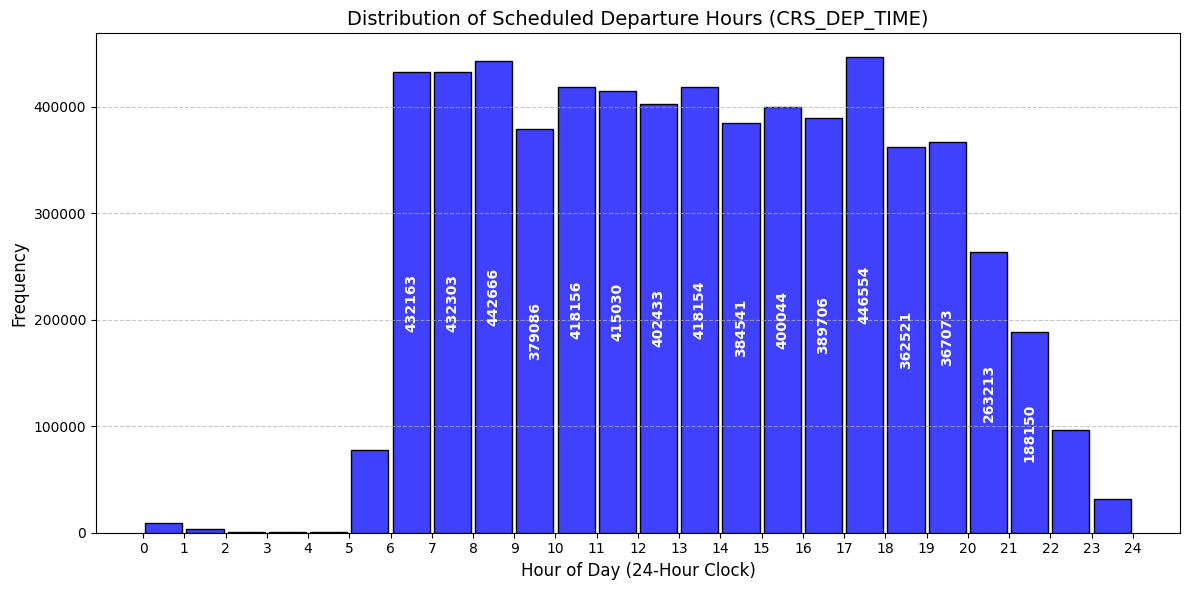

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensuring 'CRS_DEP_TIME' is in the correct string format and extracting the hour
df_cleaned2['DEP_Hour'] = df_cleaned2['CRS_DEP_TIME'].str.split(':').str[0].astype(int)

# Plotting the distribution of DEP_Hour
plt.figure(figsize=(12, 6))
ax = sns.histplot(
    df_cleaned2['DEP_Hour'], 
    bins=range(25), 
    kde=False, 
    color='blue', 
    shrink=0.9  # Adjusts the bar width
)

# Adding text annotations inside each bar, vertically, only for counts > 100000
for p in ax.patches:
    count = int(p.get_height())  # Getting the height of each bar
    if count > 100000:  # Only annotating bars with counts over 100000
        ax.annotate(
            f'{count}',
            (p.get_x() + p.get_width() / 2., count / 2),  # Centering inside the bar
            ha='center', va='center', fontsize=10, color='white', weight='bold',
            rotation=90  # Makes the text vertical
        )


plt.title('Distribution of Scheduled Departure Hours (CRS_DEP_TIME)', fontsize=14)
plt.xlabel('Hour of Day (24-Hour Clock)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(range(0, 25))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

From this plot, it is possible to see that the distribution of planned departure time is very similar from 6:00 to 19:59. Timespan 17:00 - 17:59 had the most planned departures (446554) and it was closely followed by timespan 8:00 - 8:59 (442666 planned departures). Third most popular timespan for planned departures was 7:00 - 7:59 with 432303 planned departures. Let's classify only timespans 17:00 - 17:59 and 8:00 - 8:59 as rush hours for departures and later use this information to see if departure time at rush hour caused bigger delay.

Let's create a binary feature 'DEP_Rush_Hour' that has value 1 when scheduled departure time was in timespans 8:00 - 8:59 or 17:00 - 17:59. We can use previously defined feature 'DEP_Hour' to define this feature.

In [124]:
df_cleaned2['DEP_Rush_Hour'] = df_cleaned2['DEP_Hour'].apply(lambda x: 1 if x == 8 or x == 17 else 0)

In [125]:
df_cleaned2[['DEP_Hour', 'DEP_Rush_Hour']].head(20) # Checking if it worked

,DEP_Hour,DEP_Rush_Hour
0,7,0
1,22,0
2,7,0
3,7,0
4,11,0
5,11,0
6,15,0
7,20,0
8,7,0
9,21,0


Now, let's repeat the process for arrivals but now focus on actual arrival times, not scheduled arrival times. Reasoning for focusing on actual arrival times is that results from further analysis will be more realistic.

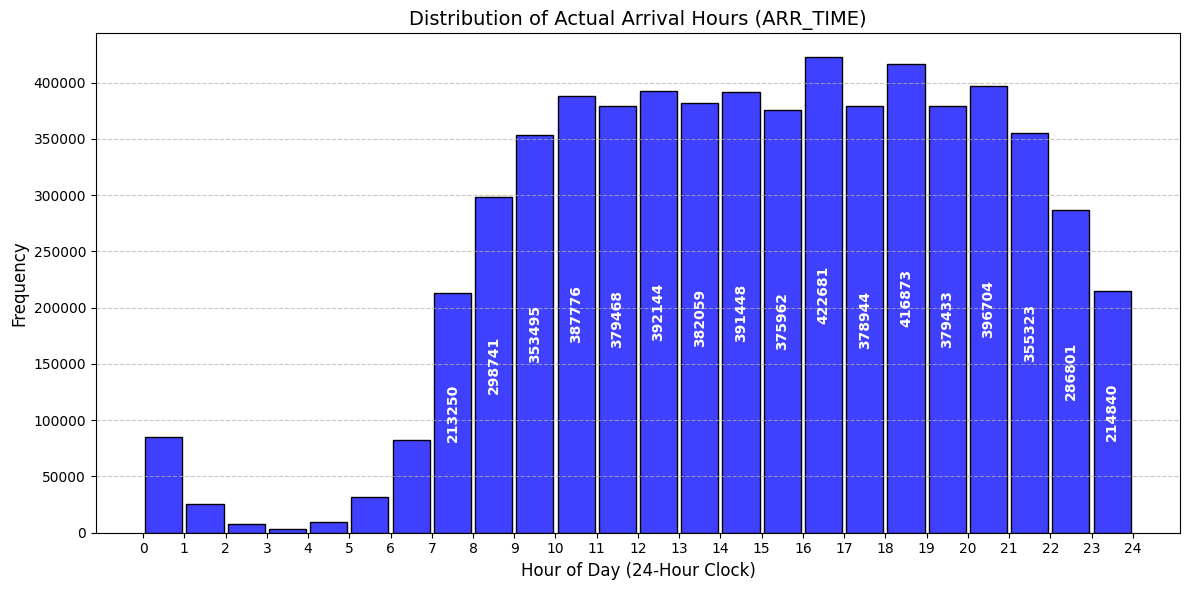

In [126]:

# Creating the 'ARR_Hour' feature, extract hour only for non-NaT values
df_cleaned2['ARR_Hour'] = df_cleaned2['ARR_TIME'].apply(lambda x: int(x.split(':')[0]) if pd.notna(x) else pd.NaT)



# Plotting the distribution of DEP_Hour
plt.figure(figsize=(12, 6))
ax = sns.histplot(
    df_cleaned2['ARR_Hour'], 
    bins=range(25), 
    kde=False, 
    color='blue', 
    shrink=0.9  # Adjusts the bar width
)

# Adding text annotations inside each bar, vertically, only for counts > 100000
for p in ax.patches:
    count = int(p.get_height())  # Getting the height of each bar
    if count > 100000:  # Only annotating bars with counts over 100000
        ax.annotate(
            f'{count}',
            (p.get_x() + p.get_width() / 2., count / 2),  # Centering inside the bar
            ha='center', va='center', fontsize=10, color='white', weight='bold',
            rotation=90  # Makes the text vertical
        )


plt.title('Distribution of Actual Arrival Hours (ARR_TIME)', fontsize=14)
plt.xlabel('Hour of Day (24-Hour Clock)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(range(0, 25))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

From this plot, it is possible to see that the distribution of arrival time is very similar from 9:00 to 21:59 (it still has some peaks). Timespan 16:00 - 16:59 had the most arrivals (422681) and it was followed by timespan 18:00 - 18:59 (416873 arrivals). Third most popular timespan for arrivals was 20:00 - 20:59 with 396704 arrivals. Let's classify only timespans 16:00 - 16:59 and 18:00 - 18:59 as rush hours for arrivals and later use this information to see if arrival time at rush hour caused bigger time duration between wheels-on and gate arrival at the destination airport ('TAXI_IN' feature).

Let's create a binary feature 'ARR_Rush_Hour' that has value 1 when actual arrival time was in timespans 16:00 - 16:59 or 18:00 - 18:59. We can use previously defined feature 'ARR_Hour' to define this feature.

In [127]:
df_cleaned2['ARR_Rush_Hour'] = df_cleaned2['ARR_Hour'].apply(
    lambda x: 1 if pd.notna(x) and (x == 16 or x == 18) else 0
)

In [128]:
print(df_cleaned2[['ARR_Hour', 'ARR_Rush_Hour']].head(20)) # Checking if it worked

   ARR_Hour  ARR_Rush_Hour
0        14              0
1         5              0
2        10              0
3        10              0
4        18              1
5        14              0
6        23              0
7        23              0
8        15              0
9         5              0
10       14              0
11       19              0
12       16              1
13       11              0
14       21              0
15        7              0
16       20              0
17       23              0
18       21              0
19       10              0


Let's also make features 'DEP_DELAY_CATEGORY' and 'ARR_DELAY_CATEGORY' that represent the state of the flight. If delay was 0 minutes or negative amount of minutes (took off or landed before scheduled) then there was no delay. If delay was 1 to 15 minutes then there was minor delay and if delay was at least 16 minutes then this was severe delay.

In [129]:
# Classifying DEP_DELAY into categories
df_cleaned2['DEP_DELAY_CATEGORY'] = df_cleaned2['DEP_DELAY'].apply(
    lambda x: 'No Delay' if x <= 0 else ('Minor Delay' if 1 <= x <= 15 else 'Severe Delay')
)

# Classifying ARR_DELAY into categories
df_cleaned2['ARR_DELAY_CATEGORY'] = df_cleaned2['ARR_DELAY'].apply(
    lambda x: 'No Delay' if x <= 0 else ('Minor Delay' if 1 <= x <= 15 else 'Severe Delay')
)

# Checking the result
print(df_cleaned2[['DEP_DELAY', 'DEP_DELAY_CATEGORY', 'ARR_DELAY', 'ARR_DELAY_CATEGORY']].head(20))


    DEP_DELAY DEP_DELAY_CATEGORY  ARR_DELAY ARR_DELAY_CATEGORY
0           0           No Delay        -27           No Delay
1          -1           No Delay         -9           No Delay
2          -1           No Delay        -26           No Delay
3           0           No Delay         14        Minor Delay
4           4        Minor Delay        -38           No Delay
5          -3           No Delay         -1           No Delay
6          -1           No Delay        -46           No Delay
7         -10           No Delay          4        Minor Delay
8          -2           No Delay        -18           No Delay
9          -1           No Delay        -38           No Delay
10         -3           No Delay        -43           No Delay
11          5        Minor Delay        -19           No Delay
12          2        Minor Delay         -2           No Delay
13         -3           No Delay        -15           No Delay
14         -4           No Delay         -8           N

# **INVESTIGATING ANOMALIES WITHIN THE DATA**

Let's now check for statistics of the features to see if there are any anomalies.

In [130]:
print(df_cleaned2.dtypes) # Let's first check for numerical features

FL_DATE                datetime64[ns]
OP_CARRIER                     object
OP_CARRIER_FL_NUM               int64
ORIGIN                         object
DEST                           object
CRS_DEP_TIME                   object
DEP_TIME                       object
DEP_DELAY                       Int64
TAXI_OUT                        Int64
WHEELS_OFF                     object
WHEELS_ON                      object
TAXI_IN                         Int64
CRS_ARR_TIME                   object
ARR_TIME                       object
ARR_DELAY                       Int64
CANCELLED                       Int64
CANCELLATION_CODE              object
DIVERTED                        Int64
CRS_ELAPSED_TIME                Int64
ACTUAL_ELAPSED_TIME             Int64
AIR_TIME                        Int64
DISTANCE                        Int64
CARRIER_DELAY                   Int64
WEATHER_DELAY                   Int64
NAS_DELAY                       Int64
SECURITY_DELAY                  Int64
LATE_AIRCRAF

In [131]:
# Selecting only relevant numerical features for summary statistics
numerical_features = ['DEP_DELAY', 'TAXI_OUT', 'TAXI_IN', 'ARR_DELAY', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 
    'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']

# Generating descriptive statistics for numerical features
numerical_stats = df_cleaned2[numerical_features].describe()

# Displaying the statistics
numerical_stats


,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
count,6271207.0,6271207.0,6271207.0,6271207.0,6362888.0,6271207.0,6271207.0,6362888.0,1269277.0,1269277.0,1269277.0,1269277.0,1269277.0
mean,9.703084,15.596264,6.776451,6.349352,132.744554,129.728902,107.356187,762.218162,16.652706,2.343187,13.729758,0.081661,23.868734
std,35.595285,9.040526,4.723289,39.141906,72.036487,72.473279,70.568993,584.863578,43.581631,17.025016,27.65401,2.627572,41.037532
min,-171.0,1.0,1.0,-667.0,20.0,-568.0,-586.0,17.0,0.0,0.0,0.0,0.0,0.0
25%,-5.0,10.0,4.0,-12.0,81.0,78.0,57.0,338.0,0.0,0.0,0.0,0.0,0.0
50%,-1.0,13.0,6.0,-3.0,114.0,110.0,88.0,594.0,1.0,0.0,3.0,0.0,7.0
75%,9.0,18.0,8.0,10.0,162.0,159.0,136.0,991.0,16.0,0.0,18.0,0.0,31.0
max,1975.0,237.0,346.0,1983.0,700.0,1526.0,1490.0,4983.0,1975.0,1591.0,1287.0,573.0,1182.0


There seem to be some conflicts within the data. Let's investigate.

'DEP_DELAY' - minimum value was -171 which means that the flight departed 2 hours and 51 minutes before it was scheduled to. Maximum value was 1975 which means that the flight departed 32 hours and 55 minutes after it was scheduled to. This is very suspicious and should be looked into.

'TAXI_OUT' and 'TAXI_IN' seem to be alright but the most extreme cases should be looked into (when the values were huge).

'ARR_DELAY' - minimum value was -667 which means that the flight arrived 11 hours and 7 minutes before it was scheduled to. Maximum value was 1983 which means that the flight arrived 33 hours and 3 minutes after it was scheduled to. This is very suspicious and should be looked into.

'CRS_ELAPSED_TIME' seems to be fine.

'ACTUAL_ELAPSED_TIME' - minimum value was -568 which means that the flight must have time travelled back into the past. Maximum value was 1526 which means that the flight took 25 hours and 26 minutes. Those values are unrealistic and should be looked into.

'AIR_TIME' - similar issues as in 'ACTUAL_ELAPSED_TIME'. 

'DISTANCE' seems to be fine.

For last features, maximum values should be looked into as well.

**INVESTIGATING 'DEP_DELAY'**

Let's first investigate 'DEP_DELAY'.

In [132]:
'''
# Investigating extreme 'DEP_DELAY' values

# Let's first look into where 'DEP_DELAY' was small
suspicious_dep_delay1 = df_cleaned2[(df_cleaned2['DEP_DELAY'] < -60)] 
print(suspicious_dep_delay1) # Seems like those were just extraordinary flights
'''

"\n# Investigating extreme 'DEP_DELAY' values\n\n# Let's first look into where 'DEP_DELAY' was small\nsuspicious_dep_delay1 = df_cleaned2[(df_cleaned2['DEP_DELAY'] < -60)] \nprint(suspicious_dep_delay1) # Seems like those were just extraordinary flights\n"

Let's investigate further and determine whether this data makes sense. First, we need to know from which airport to which airport those flights were flying. Then we need to know the statistics (mean, min, max) of flights between those airports and check whether 'AIR_TIME' makes sense for those flights.

In [133]:
'''
# Let's break it into steps

# Step 1: Extracting 'ORIGIN', 'DEST', and 'AIR_TIME' for these flights
flight_info = suspicious_dep_delay1[['ORIGIN', 'DEST', 'AIR_TIME']]

# Step 3: Calculating mean, min, and max 'AIR_TIME' for flights from ORIGIN to DEST in the df_cleaned2 dataset
# First, we group the original dataset by 'ORIGIN' and 'DEST', and calculate the statistics for 'AIR_TIME'
air_time_stats = df_cleaned2.groupby(['ORIGIN', 'DEST'])['AIR_TIME'].agg(['mean', 'min', 'max']).reset_index()

# Step 4: Merging the statistics with the filtered DataFrame
suspicious_dep_delay1_copy_filtered = suspicious_dep_delay1.merge(
    air_time_stats, 
    on=['ORIGIN', 'DEST'], 
    how='left'
)


print(suspicious_dep_delay1_copy_filtered[['DEP_DELAY', 'ARR_DELAY', 'ORIGIN', 'DEST', 'AIR_TIME', 'mean', 'min', 'max']])
'''

"\n# Let's break it into steps\n\n# Step 1: Extracting 'ORIGIN', 'DEST', and 'AIR_TIME' for these flights\nflight_info = suspicious_dep_delay1[['ORIGIN', 'DEST', 'AIR_TIME']]\n\n# Step 3: Calculating mean, min, and max 'AIR_TIME' for flights from ORIGIN to DEST in the df_cleaned2 dataset\n# First, we group the original dataset by 'ORIGIN' and 'DEST', and calculate the statistics for 'AIR_TIME'\nair_time_stats = df_cleaned2.groupby(['ORIGIN', 'DEST'])['AIR_TIME'].agg(['mean', 'min', 'max']).reset_index()\n\n# Step 4: Merging the statistics with the filtered DataFrame\nsuspicious_dep_delay1_copy_filtered = suspicious_dep_delay1.merge(\n    air_time_stats, \n    on=['ORIGIN', 'DEST'], \n    how='left'\n)\n\n\nprint(suspicious_dep_delay1_copy_filtered[['DEP_DELAY', 'ARR_DELAY', 'ORIGIN', 'DEST', 'AIR_TIME', 'mean', 'min', 'max']])\n"

Data seems to make sense because there are no conflicting values.

In [134]:
'''
# Now let's look into where 'DEP_DELAY' was huge
suspicious_dep_delay2 = df_cleaned2[(df_cleaned2['DEP_DELAY'] > 1440)] 
print(suspicious_dep_delay2) # Seems like those flights were just delayed by a day which can sometimes happen
'''

"\n# Now let's look into where 'DEP_DELAY' was huge\nsuspicious_dep_delay2 = df_cleaned2[(df_cleaned2['DEP_DELAY'] > 1440)] \nprint(suspicious_dep_delay2) # Seems like those flights were just delayed by a day which can sometimes happen\n"

Let's investigate further and determine whether this data makes sense. First, we need to know from which airport to which airport those flights were flying. Then we need to know the statistics (mean, min, max) of flights between those airports and check whether 'AIR_TIME' makes sense for those flights.

In [135]:
'''
# Let's break it into steps

# Step 1: Extracting 'ORIGIN', 'DEST', and 'AIR_TIME' for these flights
flight_info = suspicious_dep_delay2[['ORIGIN', 'DEST', 'AIR_TIME']]

# Step 3: Calculating mean, min, and max 'AIR_TIME' for flights from ORIGIN to DEST in the df_cleaned2 dataset
# First, we group the original dataset by 'ORIGIN' and 'DEST', and calculate the statistics for 'AIR_TIME'
air_time_stats = df_cleaned2.groupby(['ORIGIN', 'DEST'])['AIR_TIME'].agg(['mean', 'min', 'max']).reset_index()

# Step 4: Merging the statistics with the filtered DataFrame
suspicious_dep_delay2_copy_filtered = suspicious_dep_delay2.merge(
    air_time_stats, 
    on=['ORIGIN', 'DEST'], 
    how='left'
)


print(suspicious_dep_delay2_copy_filtered[['DEP_DELAY', 'ARR_DELAY', 'ORIGIN', 'DEST', 'AIR_TIME', 'mean', 'min', 'max']])
'''

"\n# Let's break it into steps\n\n# Step 1: Extracting 'ORIGIN', 'DEST', and 'AIR_TIME' for these flights\nflight_info = suspicious_dep_delay2[['ORIGIN', 'DEST', 'AIR_TIME']]\n\n# Step 3: Calculating mean, min, and max 'AIR_TIME' for flights from ORIGIN to DEST in the df_cleaned2 dataset\n# First, we group the original dataset by 'ORIGIN' and 'DEST', and calculate the statistics for 'AIR_TIME'\nair_time_stats = df_cleaned2.groupby(['ORIGIN', 'DEST'])['AIR_TIME'].agg(['mean', 'min', 'max']).reset_index()\n\n# Step 4: Merging the statistics with the filtered DataFrame\nsuspicious_dep_delay2_copy_filtered = suspicious_dep_delay2.merge(\n    air_time_stats, \n    on=['ORIGIN', 'DEST'], \n    how='left'\n)\n\n\nprint(suspicious_dep_delay2_copy_filtered[['DEP_DELAY', 'ARR_DELAY', 'ORIGIN', 'DEST', 'AIR_TIME', 'mean', 'min', 'max']])\n"

There are no problems so let's move on to investigating 'ARR_DELAY'.

**INVESTIGATING 'ARR_DELAY'**

Let's now investigate 'ARR_DELAY'.

In [136]:
'''
# Investigating extreme 'ARR_DELAY' values

# Let's first look into where 'ARR_DELAY' was small
suspicious_arr_delay1 = df_cleaned2[(df_cleaned2['ARR_DELAY'] < -100)] 
print(suspicious_arr_delay1) 
'''

"\n# Investigating extreme 'ARR_DELAY' values\n\n# Let's first look into where 'ARR_DELAY' was small\nsuspicious_arr_delay1 = df_cleaned2[(df_cleaned2['ARR_DELAY'] < -100)] \nprint(suspicious_arr_delay1) \n"

This subset of data provided us with very suspicious flights (negative 'ACTUAL_ELAPSED_TIME', 'AIR_TIME' and many more issues). We will get back to it in a bit.

In [137]:
'''
# Let's first investigate where 'ARR_DELAY' was huge and after move to negative 'ACTUAL_ELAPSED_TIME' values.
suspicious_arr_delay1 = df_cleaned2[(df_cleaned2['ARR_DELAY'] > 1440)] 
print(suspicious_arr_delay1) 
'''

"\n# Let's first investigate where 'ARR_DELAY' was huge and after move to negative 'ACTUAL_ELAPSED_TIME' values.\nsuspicious_arr_delay1 = df_cleaned2[(df_cleaned2['ARR_DELAY'] > 1440)] \nprint(suspicious_arr_delay1) \n"

Let's check if those flights experienced huge departure delay, as well.

In [138]:
'''
# Creating a copy of the suspicious_arr_delay1 DataFrame
suspicious_arr_delay1_copy = suspicious_arr_delay1.copy()

# Calculating the difference between ARR_DELAY and DEP_DELAY
suspicious_arr_delay1_copy['delay_diff'] = (suspicious_arr_delay1_copy['ARR_DELAY'] - suspicious_arr_delay1_copy['DEP_DELAY'])


# Getting the maximum absolute difference
max_delay_diff = suspicious_arr_delay1_copy['delay_diff'].max()
print(f"The maximum absolute difference between ARR_DELAY and DEP_DELAY is {max_delay_diff} minutes.")

# Let's also check with some other features to see if those things make sense
features = ['delay_diff', 'DISTANCE', 'WEATHER_DELAY', 'NAS_DELAY', 'CARRIER_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']
print(suspicious_arr_delay1_copy[features])
'''

'\n# Creating a copy of the suspicious_arr_delay1 DataFrame\nsuspicious_arr_delay1_copy = suspicious_arr_delay1.copy()\n\n# Calculating the difference between ARR_DELAY and DEP_DELAY\nsuspicious_arr_delay1_copy[\'delay_diff\'] = (suspicious_arr_delay1_copy[\'ARR_DELAY\'] - suspicious_arr_delay1_copy[\'DEP_DELAY\'])\n\n\n# Getting the maximum absolute difference\nmax_delay_diff = suspicious_arr_delay1_copy[\'delay_diff\'].max()\nprint(f"The maximum absolute difference between ARR_DELAY and DEP_DELAY is {max_delay_diff} minutes.")\n\n# Let\'s also check with some other features to see if those things make sense\nfeatures = [\'delay_diff\', \'DISTANCE\', \'WEATHER_DELAY\', \'NAS_DELAY\', \'CARRIER_DELAY\', \'SECURITY_DELAY\', \'LATE_AIRCRAFT_DELAY\']\nprint(suspicious_arr_delay1_copy[features])\n'

Flights where 'Delay_diff' was negative are a bit suspicious. Let's investigate further and determine whether this data makes sense. First, we need to know from which airport to which airport those flights were flying. Then we need to know the statistics (mean, min, max) of flights between those airports and check whether 'AIR_TIME' makes sense for those flights.

In [139]:
'''

# Let's break this task into steps

# Step 1: Filtering rows where 'delay_diff' is less than -5 (threshold for what we see as suspicion)
suspicious_arr_delay1_copy_filtered = suspicious_arr_delay1_copy[suspicious_arr_delay1_copy['delay_diff'] < -5]

# Step 2: Extracting 'ORIGIN', 'DEST', and 'AIR_TIME' for these flights
flight_info = suspicious_arr_delay1_copy_filtered[['ORIGIN', 'DEST', 'AIR_TIME']]

# Step 3: Calculating mean, min, and max 'AIR_TIME' for flights from 'ORIGIN' to 'DEST' in the df_cleaned2 dataset
# First, we group the original dataset by 'ORIGIN' and 'DEST', and calculate the statistics for 'AIR_TIME'
air_time_stats = df_cleaned2.groupby(['ORIGIN', 'DEST'])['AIR_TIME'].agg(['mean', 'min', 'max']).reset_index()

# Step 4: Merging the statistics with the filtered DataFrame
suspicious_arr_delay1_copy_filtered = suspicious_arr_delay1_copy_filtered.merge(
    air_time_stats, 
    on=['ORIGIN', 'DEST'], 
    how='left'
)

# Showing the final result with the statistics added
print(suspicious_arr_delay1_copy_filtered[['delay_diff', 'ORIGIN', 'DEST', 'AIR_TIME', 'mean', 'min', 'max']])
'''

"\n\n# Let's break this task into steps\n\n# Step 1: Filtering rows where 'delay_diff' is less than -5 (threshold for what we see as suspicion)\nsuspicious_arr_delay1_copy_filtered = suspicious_arr_delay1_copy[suspicious_arr_delay1_copy['delay_diff'] < -5]\n\n# Step 2: Extracting 'ORIGIN', 'DEST', and 'AIR_TIME' for these flights\nflight_info = suspicious_arr_delay1_copy_filtered[['ORIGIN', 'DEST', 'AIR_TIME']]\n\n# Step 3: Calculating mean, min, and max 'AIR_TIME' for flights from 'ORIGIN' to 'DEST' in the df_cleaned2 dataset\n# First, we group the original dataset by 'ORIGIN' and 'DEST', and calculate the statistics for 'AIR_TIME'\nair_time_stats = df_cleaned2.groupby(['ORIGIN', 'DEST'])['AIR_TIME'].agg(['mean', 'min', 'max']).reset_index()\n\n# Step 4: Merging the statistics with the filtered DataFrame\nsuspicious_arr_delay1_copy_filtered = suspicious_arr_delay1_copy_filtered.merge(\n    air_time_stats, \n    on=['ORIGIN', 'DEST'], \n    how='left'\n)\n\n# Showing the final result w

Seems like there are no anomalies within this subset of data.

**INVESTIGATING 'ACTUAL_ELAPSED_TIME'**

Let's now investigate 'ACTUAL_ELAPSED_TIME'.

In [140]:
'''
# Let's break this into steps

# Step 1: Filtering rows with negative 'ACTUAL_ELAPSED_TIME'
negative_or_high_elapsed_time = df_cleaned2[(df_cleaned2['ACTUAL_ELAPSED_TIME'] < 0)]

# Step 2: Groupping by 'ORIGIN' and 'DEST' and calculating mean, min, and max for 'ACTUAL_ELAPSED_TIME'
elapsed_time_stats = df_cleaned2.groupby(['ORIGIN', 'DEST'])['ACTUAL_ELAPSED_TIME'].agg(['mean', 'min', 'max']).reset_index()

# Step 3: Merging these statistics with the main dataset to inspect further
merged_data = negative_or_high_elapsed_time.merge(elapsed_time_stats, on=['ORIGIN', 'DEST'], how='left')



print(merged_data[['ORIGIN', 'DEST', 'DEP_TIME', 'ARR_TIME', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'mean', 'min', 'max']])

'''

"\n# Let's break this into steps\n\n# Step 1: Filtering rows with negative 'ACTUAL_ELAPSED_TIME'\nnegative_or_high_elapsed_time = df_cleaned2[(df_cleaned2['ACTUAL_ELAPSED_TIME'] < 0)]\n\n# Step 2: Groupping by 'ORIGIN' and 'DEST' and calculating mean, min, and max for 'ACTUAL_ELAPSED_TIME'\nelapsed_time_stats = df_cleaned2.groupby(['ORIGIN', 'DEST'])['ACTUAL_ELAPSED_TIME'].agg(['mean', 'min', 'max']).reset_index()\n\n# Step 3: Merging these statistics with the main dataset to inspect further\nmerged_data = negative_or_high_elapsed_time.merge(elapsed_time_stats, on=['ORIGIN', 'DEST'], how='left')\n\n\n\nprint(merged_data[['ORIGIN', 'DEST', 'DEP_TIME', 'ARR_TIME', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'mean', 'min', 'max']])\n\n"

It seems like there is something wrong with the data on all cases where 'ACTUAL_ELAPSED_TIME' was negative and it should be removed from the data. Let's do that.

In [141]:
'''
df_cleaned2 = df_cleaned2[df_cleaned2['ACTUAL_ELAPSED_TIME'] > 0]
'''

"\ndf_cleaned2 = df_cleaned2[df_cleaned2['ACTUAL_ELAPSED_TIME'] > 0]\n"

Let's now investigate where 'ACTUAL_ELAPSED_TIME' values are extremely huge.

In [142]:
'''
# Let's break this into steps

# Step 1: Filtering rows with negative 'ACTUAL_ELAPSED_TIME'
high_elapsed_time = df_cleaned2[(df_cleaned2['ACTUAL_ELAPSED_TIME'] > 700)]

# Step 2: Groupping by 'ORIGIN' and 'DEST' and calculating mean, min, and max for 'ACTUAL_ELAPSED_TIME'
elapsed_time_stats = df_cleaned2.groupby(['ORIGIN', 'DEST'])['ACTUAL_ELAPSED_TIME'].agg(['mean', 'min', 'max']).reset_index()

# Step 3: Merging these statistics with the main dataset to inspect further
merged_data = high_elapsed_time.merge(elapsed_time_stats, on=['ORIGIN', 'DEST'], how='left')



print(merged_data[['ORIGIN', 'DEST', 'DEP_TIME', 'ARR_TIME', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'mean', 'min', 'max']])
'''


"\n# Let's break this into steps\n\n# Step 1: Filtering rows with negative 'ACTUAL_ELAPSED_TIME'\nhigh_elapsed_time = df_cleaned2[(df_cleaned2['ACTUAL_ELAPSED_TIME'] > 700)]\n\n# Step 2: Groupping by 'ORIGIN' and 'DEST' and calculating mean, min, and max for 'ACTUAL_ELAPSED_TIME'\nelapsed_time_stats = df_cleaned2.groupby(['ORIGIN', 'DEST'])['ACTUAL_ELAPSED_TIME'].agg(['mean', 'min', 'max']).reset_index()\n\n# Step 3: Merging these statistics with the main dataset to inspect further\nmerged_data = high_elapsed_time.merge(elapsed_time_stats, on=['ORIGIN', 'DEST'], how='left')\n\n\n\nprint(merged_data[['ORIGIN', 'DEST', 'DEP_TIME', 'ARR_TIME', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'mean', 'min', 'max']])\n"

There are many issues but for starters, let's get rid of some of them. We know that 'ACTUAL_ELAPSED_TIME' should be 'ARR_TIME' - 'DEP_TIME'. It can be different if flight arrived on the next day of arrival or if there were timezone differences. However, there is 1 common thing in all those cases - modulo of the 'ARR_TIME' - 'DEP_TIME' with 60 should be the same as modulo of the 'ACTUAL_ELAPSED_TIME' with 60. We can determine the cases where it is not the case and conclude that there was wrong input in at least 1 column. Then we can remove those rows.

In [143]:
'''
# Let's break this into steps

# Step 1: Convert 'ARR_TIME' and 'DEP_TIME' to minutes past midnight
def time_to_minutes(time_str):
    hours, minutes = map(int, time_str.split(":"))
    return hours * 60 + minutes

df_cleaned2['DEP_TIME_minutes'] = df_cleaned2['DEP_TIME'].apply(time_to_minutes)
df_cleaned2['ARR_TIME_minutes'] = df_cleaned2['ARR_TIME'].apply(time_to_minutes)

# Step 2: Calculate 'ARR_TIME' - 'DEP_TIME' in minutes
df_cleaned2['calculated_duration'] = df_cleaned2['ARR_TIME_minutes'] - df_cleaned2['DEP_TIME_minutes']


# Step 3: Compare modulo 60 of 'ARR_TIME' - 'DEP_TIME' with 'ACTUAL_ELAPSED_TIME' and
# remove rows where the mod 60 values don't match
df_cleaned2test = df_cleaned2[df_cleaned2['calculated_duration'] % 60 == df_cleaned2['ACTUAL_ELAPSED_TIME'] % 60]


df_cleaned2test.head()
'''

'\n# Let\'s break this into steps\n\n# Step 1: Convert \'ARR_TIME\' and \'DEP_TIME\' to minutes past midnight\ndef time_to_minutes(time_str):\n    hours, minutes = map(int, time_str.split(":"))\n    return hours * 60 + minutes\n\ndf_cleaned2[\'DEP_TIME_minutes\'] = df_cleaned2[\'DEP_TIME\'].apply(time_to_minutes)\ndf_cleaned2[\'ARR_TIME_minutes\'] = df_cleaned2[\'ARR_TIME\'].apply(time_to_minutes)\n\n# Step 2: Calculate \'ARR_TIME\' - \'DEP_TIME\' in minutes\ndf_cleaned2[\'calculated_duration\'] = df_cleaned2[\'ARR_TIME_minutes\'] - df_cleaned2[\'DEP_TIME_minutes\']\n\n\n# Step 3: Compare modulo 60 of \'ARR_TIME\' - \'DEP_TIME\' with \'ACTUAL_ELAPSED_TIME\' and\n# remove rows where the mod 60 values don\'t match\ndf_cleaned2test = df_cleaned2[df_cleaned2[\'calculated_duration\'] % 60 == df_cleaned2[\'ACTUAL_ELAPSED_TIME\'] % 60]\n\n\ndf_cleaned2test.head()\n'

In [144]:
'''
print(df_cleaned2.shape)
print(df_cleaned2test.shape)
'''

'\nprint(df_cleaned2.shape)\nprint(df_cleaned2test.shape)\n'

6271173 - 6260006 = 11167 rows were removed.

Let's check if this reduced some of our problems.

In [145]:
'''
# Let's break this into steps

# Step 1: Filtering rows with negative 'ACTUAL_ELAPSED_TIME'
high_elapsed_time = df_cleaned2test[(df_cleaned2test['ACTUAL_ELAPSED_TIME'] > 700)]

# Step 2: Groupping by 'ORIGIN' and 'DEST' and calculating mean, min, and max for 'ACTUAL_ELAPSED_TIME'
elapsed_time_stats = df_cleaned2test.groupby(['ORIGIN', 'DEST'])['ACTUAL_ELAPSED_TIME'].agg(['mean', 'min', 'max']).reset_index()

# Step 3: Merging these statistics with the main dataset to inspect further
merged_data = high_elapsed_time.merge(elapsed_time_stats, on=['ORIGIN', 'DEST'], how='left')



print(merged_data[['ORIGIN', 'DEST', 'DEP_TIME', 'ARR_TIME', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'mean', 'min', 'max']])
'''

"\n# Let's break this into steps\n\n# Step 1: Filtering rows with negative 'ACTUAL_ELAPSED_TIME'\nhigh_elapsed_time = df_cleaned2test[(df_cleaned2test['ACTUAL_ELAPSED_TIME'] > 700)]\n\n# Step 2: Groupping by 'ORIGIN' and 'DEST' and calculating mean, min, and max for 'ACTUAL_ELAPSED_TIME'\nelapsed_time_stats = df_cleaned2test.groupby(['ORIGIN', 'DEST'])['ACTUAL_ELAPSED_TIME'].agg(['mean', 'min', 'max']).reset_index()\n\n# Step 3: Merging these statistics with the main dataset to inspect further\nmerged_data = high_elapsed_time.merge(elapsed_time_stats, on=['ORIGIN', 'DEST'], how='left')\n\n\n\nprint(merged_data[['ORIGIN', 'DEST', 'DEP_TIME', 'ARR_TIME', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'mean', 'min', 'max']])\n"

That was only 1 of the 7 rules that should logically apply to all rows in our data. Those 7 rules are as they follow:

**RULE 1: (ARR_TIME - DEP_TIME) mod 60 = (ACTUAL_ELAPSED_TIME) mod 60**, note that DEP_TIME and ARR_TIME need to be in minutes after midnight system.

**RULE 2: (WHEELS_ON - WHEELS_OFF) mod 60 = (AIR_TIME) mod 60**, note that WHEELS_ON and WHEELS_OFF need to be in minutes after midnight system.

**RULE 3: (TAXI_OUT + TAXI_IN + AIR_TIME) = ACTUAL_ELAPSED_TIME**.

**RULE 4: (CRS_ARR_TIME - CRS_DEP_TIME) mod 60 = (CRS_ELAPSED_TIME) mod 60**, note that CRS_ARR_TIME and CRS_DEP_TIME need to be in minutes after midnight system.

**RULE 5: (CRS_DEP_TIME + DEP_DELAY) = DEP_TIME**, not that CRS_DEP_TIME and DEP_TIME need to be in minutes after midnight system.

**RULE 6: (CRS_ARR_TIME + ARR_DELAY) = ARR_TIME**, not that CRS_ARR_TIME and ARR_TIME need to be in minutes after midnight system.

**RULE 7: (WEATHER_DELAY + NAS_DELAY + CARRIER_DELAY + SECURITY_DELAY + LATE_AIRCRAFT_DELAY) = ARR_DELAY**, note that if WEATHER_DELAY, NAS_DELAY, CARRIER_DELAY, SECURITY_DELAY, LATE_AIRCRAFT_DELAY are given.

Let's make sure all 7 rules are present in the dataset.

In [ ]:
# Helper function to convert time in HH:MM format to minutes after midnight
def time_to_minutes(time_str):
    if pd.isna(time_str):
        return None
    hours, minutes = map(int, time_str.split(":"))
    return hours * 60 + minutes


# Function to check the 7 rules
def apply_rules(df):
    # Rule 1: (ARR_TIME - DEP_TIME) mod 60 = (ACTUAL_ELAPSED_TIME) mod 60
    df['ARR_TIME_MINUTES'] = df['ARR_TIME'].apply(time_to_minutes)
    df['DEP_TIME_MINUTES'] = df['DEP_TIME'].apply(time_to_minutes)
    rule_1 = (df['ARR_TIME_MINUTES'] - df['DEP_TIME_MINUTES']) % 60 == df['ACTUAL_ELAPSED_TIME'] % 60
    
    # Rule 2: (WHEELS_ON - WHEELS_OFF) mod 60 = (AIR_TIME) mod 60
    df['WHEELS_ON_MINUTES'] = df['WHEELS_ON'].apply(time_to_minutes)
    df['WHEELS_OFF_MINUTES'] = df['WHEELS_OFF'].apply(time_to_minutes)
    rule_2 = (df['WHEELS_ON_MINUTES'] - df['WHEELS_OFF_MINUTES']) % 60 == df['AIR_TIME'] % 60
    
    # Rule 3: (TAXI_OUT + TAXI_IN + AIR_TIME) = ACTUAL_ELAPSED_TIME
    rule_3 = (df['TAXI_OUT'] + df['TAXI_IN'] + df['AIR_TIME']) == df['ACTUAL_ELAPSED_TIME']
    
    # Rule 4: (CRS_ARR_TIME - CRS_DEP_TIME) mod 60 = (CRS_ELAPSED_TIME) mod 60
    df['CRS_ARR_TIME_MINUTES'] = df['CRS_ARR_TIME'].apply(time_to_minutes)
    df['CRS_DEP_TIME_MINUTES'] = df['CRS_DEP_TIME'].apply(time_to_minutes)
    rule_4 = (df['CRS_ARR_TIME_MINUTES'] - df['CRS_DEP_TIME_MINUTES']) % 60 == df['CRS_ELAPSED_TIME'] % 60
    
    # Rule 5: (CRS_DEP_TIME + DEP_DELAY) = DEP_TIME
    rule_5 = (df['CRS_DEP_TIME_MINUTES'] + df['DEP_DELAY']) == df['DEP_TIME_MINUTES']
    
    # Rule 6: (CRS_ARR_TIME + ARR_DELAY) = ARR_TIME
    rule_6 = (df['CRS_ARR_TIME_MINUTES'] + df['ARR_DELAY']) == df['ARR_TIME_MINUTES']
    
    # Rule 7: (WEATHER_DELAY + NAS_DELAY + CARRIER_DELAY + SECURITY_DELAY + LATE_AIRCRAFT_DELAY) = ARR_DELAY
    if 'WEATHER_DELAY' in df.columns and 'NAS_DELAY' in df.columns and 'CARRIER_DELAY' in df.columns and \
       'SECURITY_DELAY' in df.columns and 'LATE_AIRCRAFT_DELAY' in df.columns:
        rule_7 = (df['WEATHER_DELAY'] + df['NAS_DELAY'] + df['CARRIER_DELAY'] + df['SECURITY_DELAY'] + df['LATE_AIRCRAFT_DELAY']) == df['ARR_DELAY']
    else:
        rule_7 = pd.Series([True] * len(df))  # If delays are missing, consider the rule as satisfied

    # Combine all rules: Keep only rows where all rules are True
    valid_rows = rule_1 & rule_2 & rule_3 & rule_4 & rule_5 & rule_6 & rule_7
    return df[valid_rows]



df_cleaned2 = apply_rules(df_cleaned2)

# Now df_cleaned2 will have only rows that satisfy all 7 rules
print(df_cleaned2.shape)

This leaves us with only 1202315 rows to work with. Let's see, if it fixed all of our problems.

In [147]:
numerical_features = ['DEP_DELAY', 'TAXI_OUT', 'TAXI_IN', 'ARR_DELAY', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 
    'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']

# Generating descriptive statistics for numerical features
numerical_stats = df_cleaned2[numerical_features].describe()

# Displaying the statistics
numerical_stats


,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
count,1202315.0,1202315.0,1202315.0,1202315.0,1202315.0,1202315.0,1202315.0,1202315.0,1202315.0,1202315.0,1202315.0,1202315.0,1202315.0
mean,47.852366,20.11943,7.694231,52.884641,132.671798,137.704073,109.890413,758.578269,15.401935,2.045535,13.622117,0.075844,21.73921
std,53.306765,14.771944,6.961671,50.833116,70.711527,74.01785,70.890773,570.457698,37.16279,14.21704,26.416087,2.380783,36.73634
min,-56.0,1.0,1.0,15.0,20.0,15.0,8.0,31.0,0.0,0.0,0.0,0.0,0.0
25%,16.0,11.0,4.0,22.0,82.0,84.0,59.0,346.0,0.0,0.0,0.0,0.0,0.0
50%,34.0,15.0,6.0,35.0,115.0,120.0,91.0,602.0,1.0,0.0,3.0,0.0,6.0
75%,63.0,24.0,9.0,64.0,161.0,169.0,139.0,986.0,16.0,0.0,18.0,0.0,29.0
max,989.0,233.0,346.0,990.0,700.0,738.0,695.0,4983.0,921.0,834.0,827.0,445.0,989.0


In [ ]:
'''
# Explore data :DDDDDDDDD
# yes
mean_arr_delay = df['ARR_DELAY'].mean()
print(mean_arr_delay)

average_planned_flight_time = df['CRS_ELAPSED_TIME'].mean()
print(average_planned_flight_time)

average_flight_time = df['ACTUAL_ELAPSED_TIME'].mean()
print(average_flight_time)

average_distance = df['DISTANCE'].mean()
print(average_distance)
df['ARR_DELAY'].describe()
'''

6.010871805358738
132.7304028258521
129.32025782394544
762.0778857684188


count    6259310.0
mean      6.010872
std      38.052002
min         -153.0
25%          -12.0
50%           -3.0
75%           10.0
max         1983.0
Name: ARR_DELAY, dtype: Float64

In [151]:
'''
# Convert CRS_DEP_TIME to hour of day
df['DEP_HOUR'] = df['CRS_DEP_TIME'] // 100
delay_by_hour = df.groupby('DEP_HOUR')['ARR_DELAY'].mean()
delay_by_hour.plot(kind='line')
plt.xlabel('Hour of Day')
plt.ylabel('Average Arrival Delay')
'''

"\n# Convert CRS_DEP_TIME to hour of day\ndf['DEP_HOUR'] = df['CRS_DEP_TIME'] // 100\ndelay_by_hour = df.groupby('DEP_HOUR')['ARR_DELAY'].mean()\ndelay_by_hour.plot(kind='line')\nplt.xlabel('Hour of Day')\nplt.ylabel('Average Arrival Delay')\n"

In [152]:
'''
# Breakdown of delay types
delay_types = ['WEATHER_DELAY', 'NAS_DELAY', 'CARRIER_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']
df[delay_types].sum().plot(kind='pie', autopct='%1.1f%%')
'''

"\n# Breakdown of delay types\ndelay_types = ['WEATHER_DELAY', 'NAS_DELAY', 'CARRIER_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']\ndf[delay_types].sum().plot(kind='pie', autopct='%1.1f%%')\n"

In [154]:
'''
# Method 1: Using .loc[] with boolean indexing
first_row = df.loc[(df['ARR_DELAY'] > 80) & (df['ARR_DELAY'] < 100)].iloc[0]
print("Method 1 - First Row:")
print(first_row)
'''

'\n# Method 1: Using .loc[] with boolean indexing\nfirst_row = df.loc[(df[\'ARR_DELAY\'] > 80) & (df[\'ARR_DELAY\'] < 100)].iloc[0]\nprint("Method 1 - First Row:")\nprint(first_row)\n'

This suggests that "DelayMinutes" has been generated from Uniform distribution.

# EDA
Pyplot and seaborn for visualising data.  (*TODO: make explanatory text fancier and more precise.*)

In [226]:
import matplotlib.pyplot as plt
import seaborn as sns

delay_cols = ['DEP_DELAY', 'ARR_DELAY', 'SECURITY_DELAY', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'LATE_AIRCRAFT_DELAY']

Firstly let's create a heatmap between the delay factors.

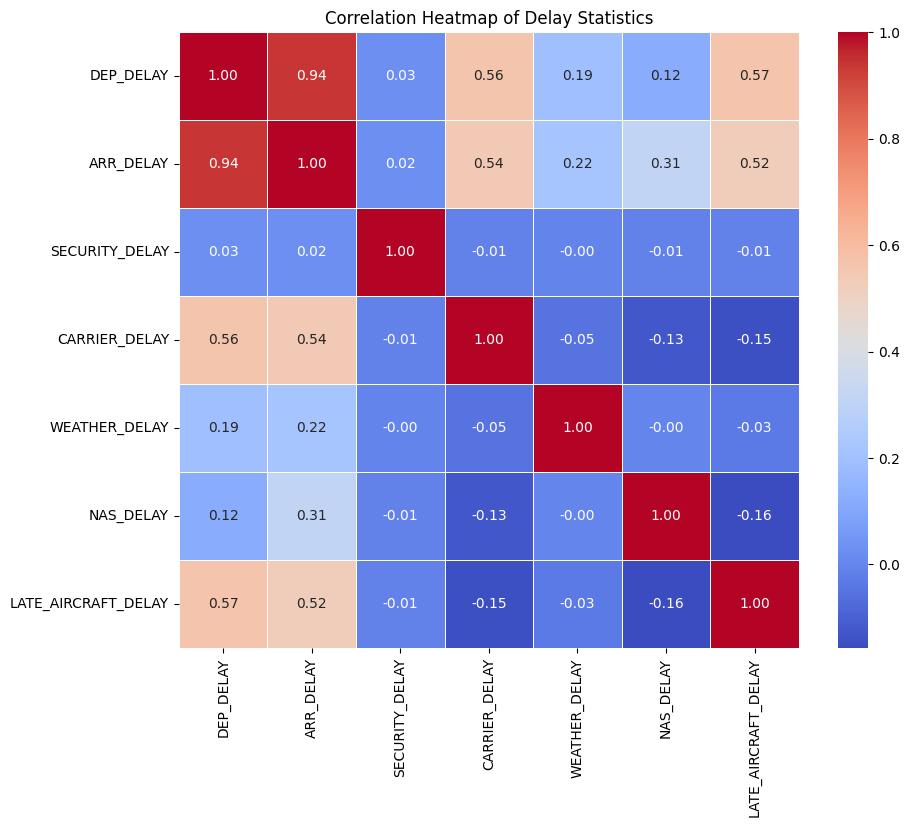

In [227]:
corr_matrix = df_cleaned2[delay_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Delay Statistics')
plt.show()

Looking at the heatmap we can see the correlations between the delay factors.
- DEP_DELAY and ARR_DELAY have high correlation. This is expected, as delayed departure results in a delayed arrival.
- DEP_DELAY and CARRIER_DELAY have a medium correlation, which means delays caused by the airline are somewhat related to departure delays.
- WEATHER_DELAY has low correlation to other factors, which means weather isn't a big cause of delays.
- LATE_AIRCRAFT_DELAY has medium correlation to DEP_DELAY and ARR_DELAY, which means aircraft delays contribute significantly to delays in departures and arrivals.
- NAS_DELAY has low correlations to other factors, which means it doesn't affect delays that much.
- Correlation with SECURITY_DELAY is minimal, as is the number of delays caused by security reasons.


Now let's create histograms for some simple delay analysis, for this we will currently use sampled_data (around 10% of the original), because the data is huge. (todo: try to use full data)

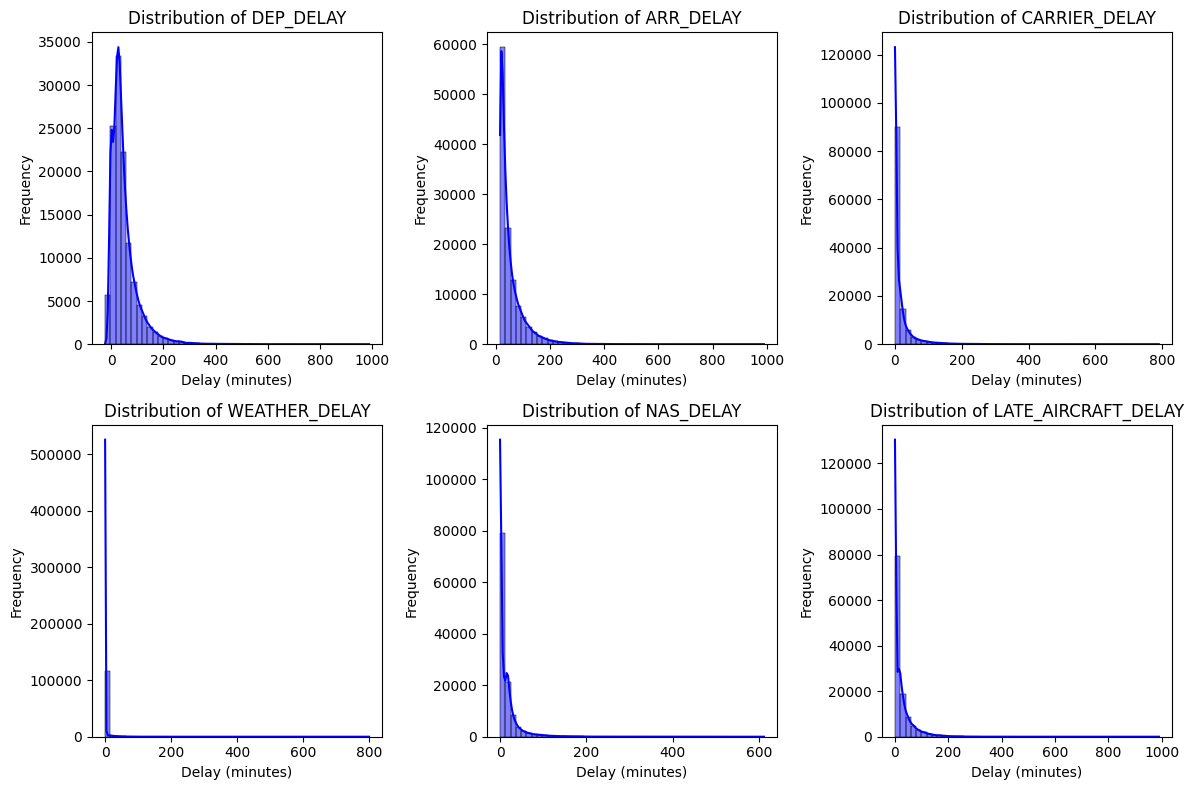

In [202]:
sampled_data = df_cleaned2.sample(frac=0.1, random_state=42)

plt.figure(figsize=(12, 8))
for i, col in enumerate(delay_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(sampled_data[col], bins=50, kde=True, color='blue', edgecolor='black')
    #plt.xscale('log')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Delay (minutes)')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Histograms show distributions of various types of delays, with most of them being around the lower end of the scale, which means most of the delays are somewhat short, but some delays are absurdly long, which seems odd.

Now let's get into delay factors breakdown by categorical variables.

Starting off with carrier delays.

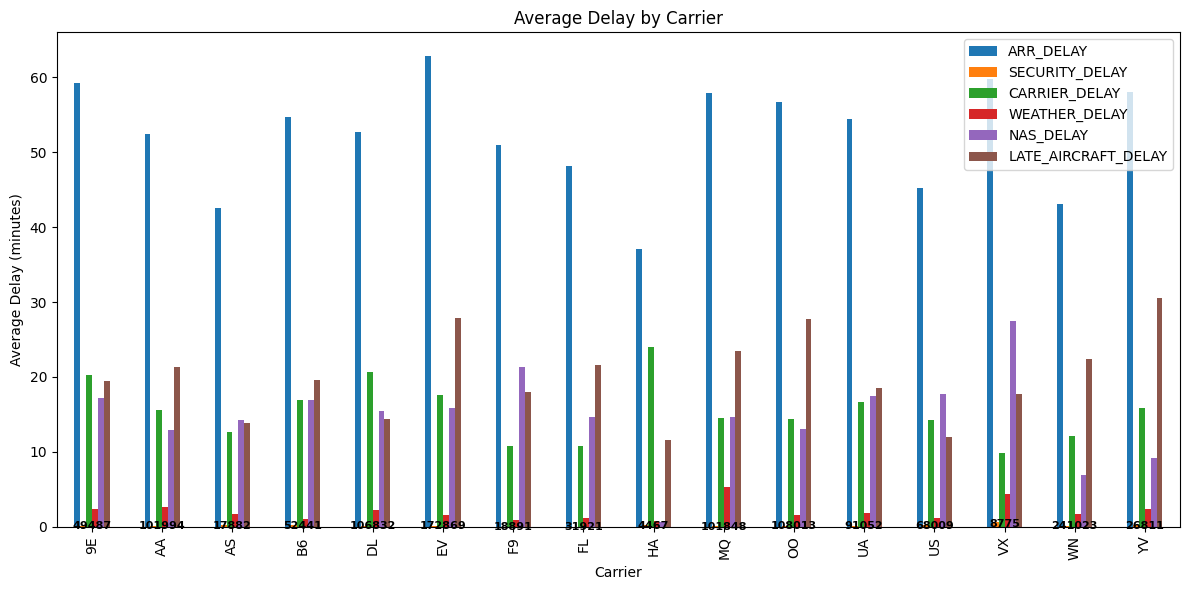

In [228]:
# Calculate mean delays

carrier_delay = df_cleaned2.groupby('OP_CARRIER')[['ARR_DELAY', 'SECURITY_DELAY' ,  'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'LATE_AIRCRAFT_DELAY']].mean()

# Calculate counts for each carrier
carrier_counts = df_cleaned2.groupby('OP_CARRIER').size()

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the bars
carrier_delay.plot(kind='bar', ax=ax)

# Add count labels inside the bottom of each carrier's group of bars
for i, carrier in enumerate(carrier_delay.index):
    # Get the height of the first bar in the group
    bar_height = carrier_delay.iloc[i].min()
    
    plt.text(i, bar_height/2, f'{carrier_counts[carrier]}', 
             horizontalalignment='center', 
             verticalalignment='center',
             color='black',  # White text for visibility
             fontweight='bold',
             fontsize=8)

plt.title('Average Delay by Carrier')
plt.xlabel('Carrier')
plt.ylabel('Average Delay (minutes)')
plt.tight_layout()
plt.show()

We can see that across the board, the biggest causers of delays are still the aircraft delay and delays caused by the carrier. The least relevant causer of delay is by far security reasons. Delays caused by the weather or by meteorogical institutes (NAS) are also rather sizeable.

Next let's look at the average departure delay by the top 30 and bottom 30 airports. We aren't using all of the airports, because there are way too many of them.

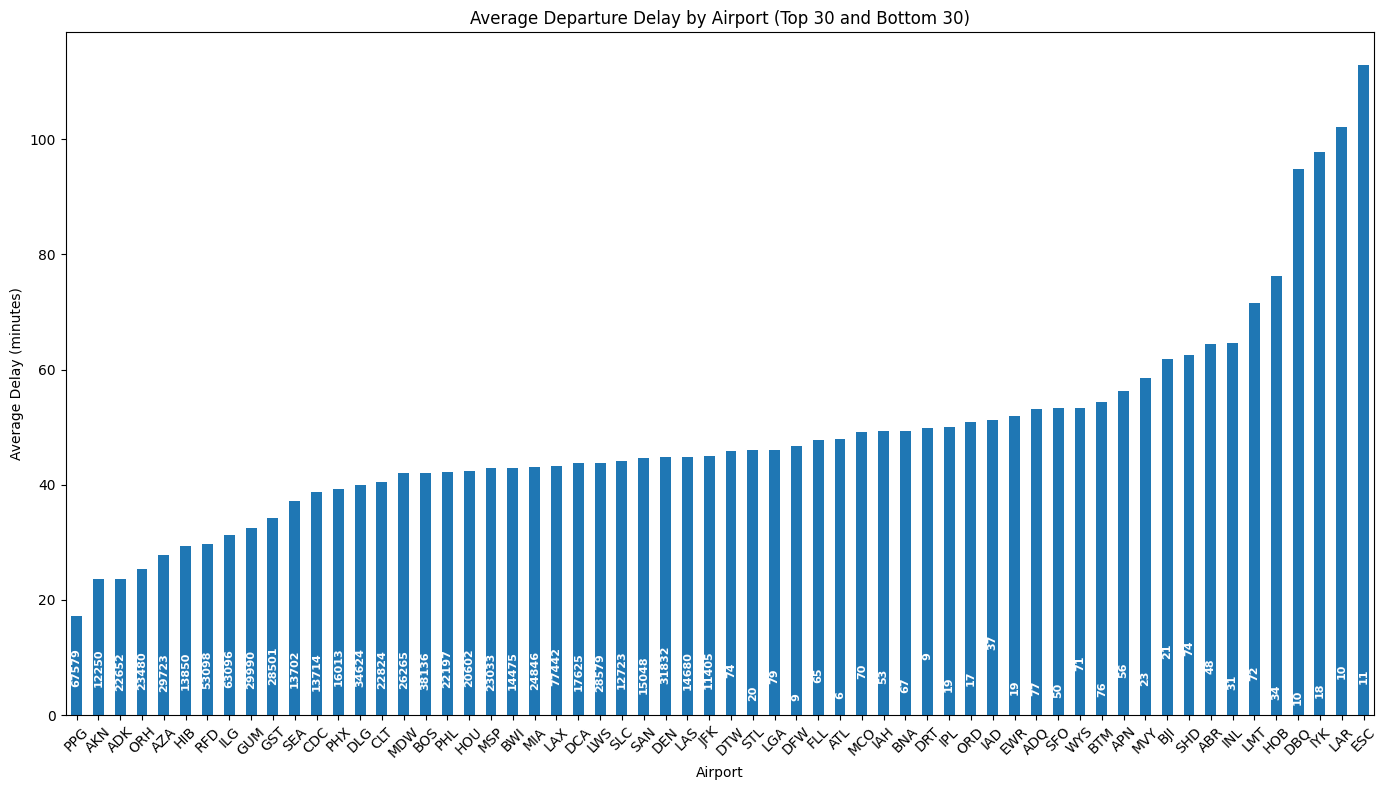

In [235]:
airport_flight_counts = df_cleaned2['ORIGIN'].value_counts()

top_30_airports = airport_flight_counts.head(30).index
bottom_30_airports = airport_flight_counts.tail(30).index
top_30_data = df_cleaned2[df_cleaned2['ORIGIN'].isin(top_30_airports)]
bottom_30_data = df_cleaned2[df_cleaned2['ORIGIN'].isin(bottom_30_airports)]
top_30_delay = top_30_data.groupby('ORIGIN')['DEP_DELAY'].mean()
bottom_30_delay = bottom_30_data.groupby('ORIGIN')['DEP_DELAY'].mean()

airport_delay = pd.concat([top_30_delay, bottom_30_delay])

# Plot the average departure delays for top 30 and bottom 30 airports
plt.figure(figsize=(14, 8))
bars = airport_delay.sort_values().plot(kind='bar')

# Add counts inside the bars
for i, airport in enumerate(airport_delay.index):
    # Get the height of the bar
    bar_height = airport_delay.iloc[i]
    
    # Get the count for this airport
    count = airport_flight_counts[airport]
    
    # Adjust position based on bar height
    vertical_position = max(bar_height * 0.1, 0.5)  # Ensure minimum visibility
    
    plt.text(i, vertical_position, f'{count}', 
             horizontalalignment='center', 
             verticalalignment='bottom',
             rotation=90,  # Rotate text vertically
             color='white',  # White text for visibility
             fontweight='bold',
             fontsize=8)

plt.title('Average Departure Delay by Airport (Top 30 and Bottom 30)')
plt.xlabel('Airport')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Looking at the plot we can see, that the largest delays are present in the airports where the fewest flights are departed from. The average delay is quite consistent for airports that have frequent flights. PPG is seemingly an outlier, having the shortest departure delay with a sizeable number of flights (67579).

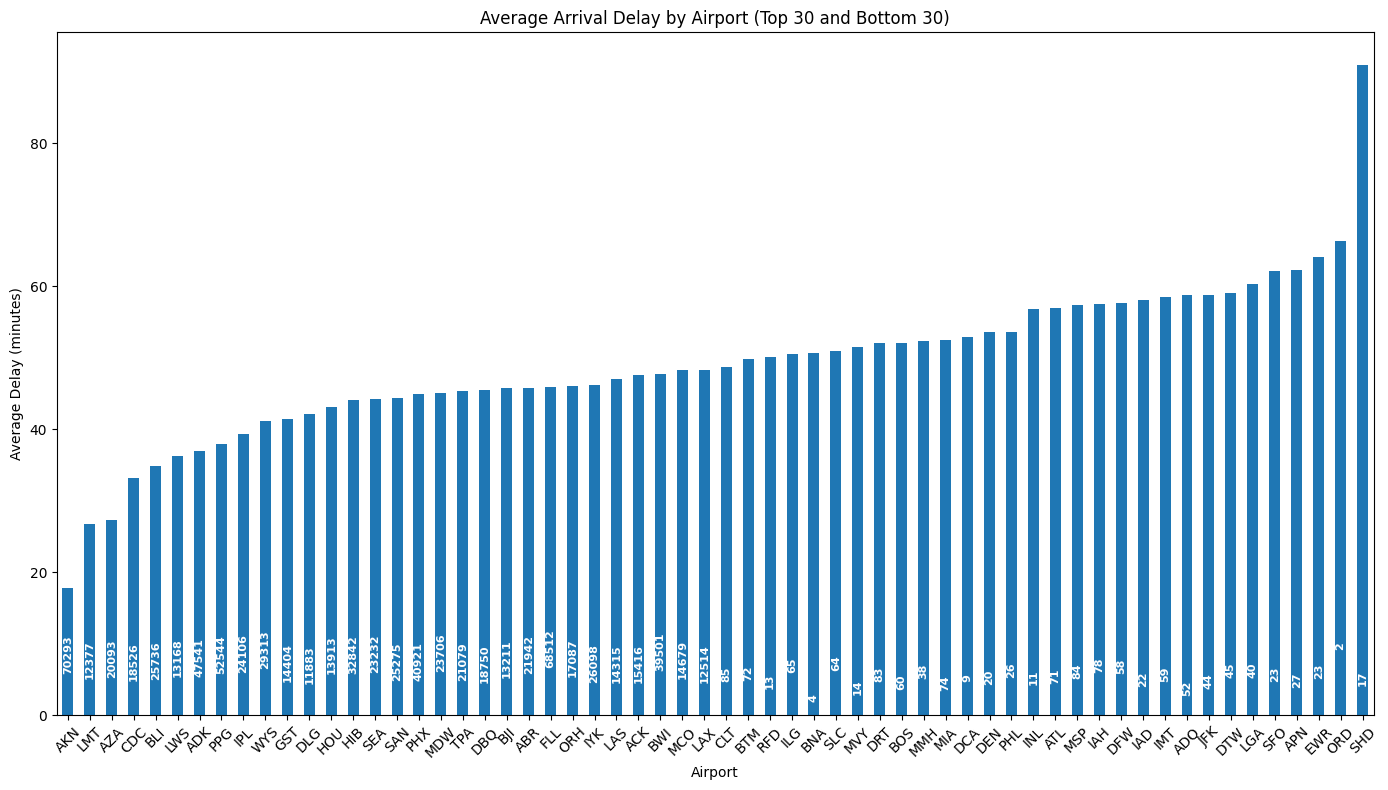

In [250]:
airport_flight_counts = df_cleaned2['DEST'].value_counts()

top_30_airports = airport_flight_counts.head(30).index
bottom_30_airports = airport_flight_counts.tail(30).index
top_30_data = df_cleaned2[df_cleaned2['DEST'].isin(top_30_airports)]
bottom_30_data = df_cleaned2[df_cleaned2['DEST'].isin(bottom_30_airports)]
top_30_delay = top_30_data.groupby('DEST')['ARR_DELAY'].mean()
bottom_30_delay = bottom_30_data.groupby('DEST')['ARR_DELAY'].mean()

airport_delay = pd.concat([top_30_delay, bottom_30_delay])

# Plot the average departure delays for top 30 and bottom 30 airports
plt.figure(figsize=(14, 8))
bars = airport_delay.sort_values().plot(kind='bar')

# Add counts inside the bars
for i, airport in enumerate(airport_delay.index):
    # Get the height of the bar
    bar_height = airport_delay.iloc[i]
    
    # Get the count for this airport
    count = airport_flight_counts[airport]
    
    # Adjust position based on bar height
    vertical_position = max(bar_height * 0.1, 0.5)  # Ensure minimum visibility
    
    plt.text(i, vertical_position, f'{count}', 
             horizontalalignment='center', 
             verticalalignment='bottom',
             rotation=90,  # Rotate text vertically
             color='white',  # White text for visibility
             fontweight='bold',
             fontsize=8)

plt.title('Average Arrival Delay by Airport (Top 30 and Bottom 30)')
plt.xlabel('Airport')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Now let's take a look at average departure delay per month.

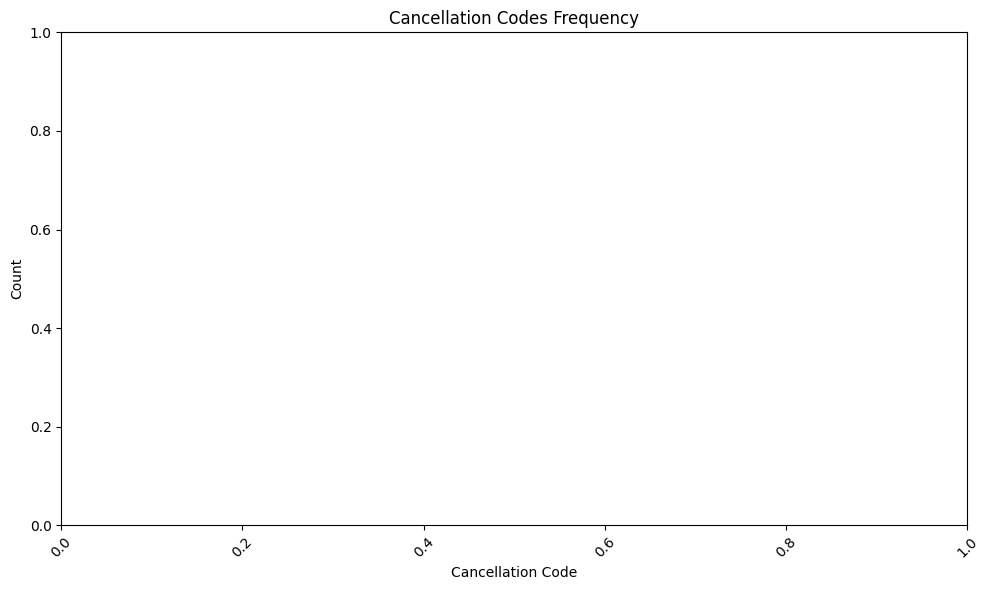

In [ ]:

# Mapping dictionary for cancellation codes
cancellation_map = {
    'A': 'Airline/Carrier',
    'B': 'Weather',
    'C': 'National Air System',
    'D': 'Security'
}

# Count the occurrences of each cancellation code
cancellation_counts = df_cleaned2['CANCELLATION_CODE'].value_counts()

# Create a bar plot with mapped labels
plt.figure(figsize=(10, 6))
sns.barplot(
    x=cancellation_counts.index.map(cancellation_map),
    y=cancellation_counts.values
)
plt.title('Cancellation Codes Frequency')
plt.xlabel('Cancellation Reason')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:

monthly_delay = df_cleaned2.groupby(df_cleaned2['FL_DATE'].dt.month)['DEP_DELAY'].mean()

### Delay by month

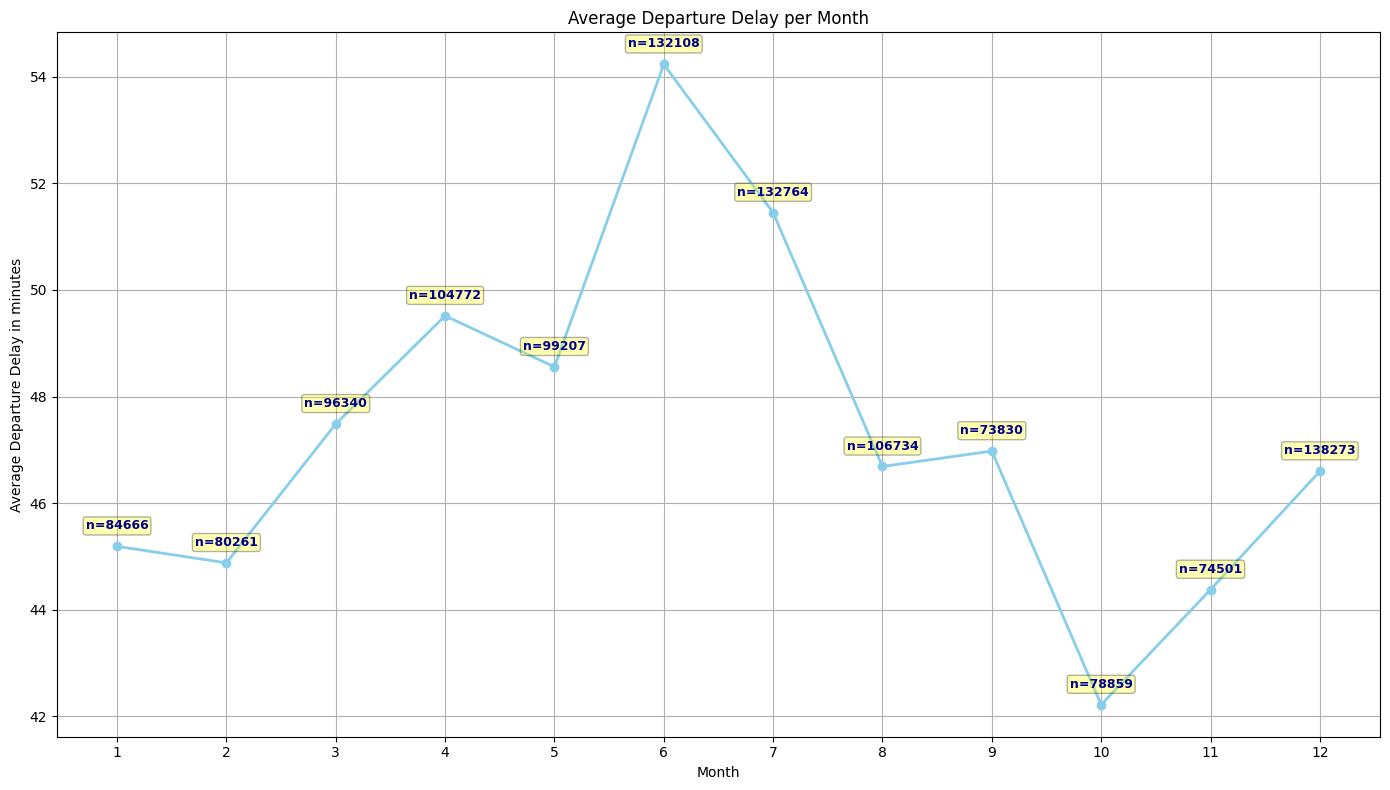

In [268]:
# Extract Year and Month from FL_DATE
#df_cleaned2['FL_DATE'] = pd.to_datetime(df_cleaned2['FL_DATE'], errors='coerce')
#df_cleaned2.loc[:, 'Year_Month'] = df_cleaned2['FL_DATE'].dt.to_period('M')

# Group by Year-Month and calculate the average departure delay
#monthly_delay = df_cleaned2.groupby('Year_Month')['DEP_DELAY'].mean()
# Calculate monthly delay
monthly_delay = df_cleaned2.groupby(df_cleaned2['FL_DATE'].dt.month)['DEP_DELAY'].mean()

# Calculate monthly flight counts
monthly_counts = df_cleaned2.groupby(df_cleaned2['FL_DATE'].dt.month).size()

# Plot
plt.figure(figsize=(14, 8))
line = monthly_delay.plot(kind='line', marker='o', color='skyblue', linestyle='-', linewidth=2)

# Add flight counts near each point
for month, delay in monthly_delay.items():
    count = monthly_counts[month]
    plt.annotate(f'n={count}', 
                 xy=(month, delay), 
                 xytext=(0, 10),  # 10 points vertical offset
                 textcoords='offset points',
                 ha='center', 
                 va='bottom',
                 fontweight='bold',
                 color='darkblue',
                 fontsize=9,
                 bbox=dict(boxstyle='round,pad=0.2', 
                           fc='yellow', 
                           alpha=0.3))

plt.title('Average Departure Delay per Month')
plt.xlabel('Month')
plt.ylabel('Average Departure Delay in minutes')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.grid(True)
plt.tight_layout()
plt.show()


Taking a look at the plot, we can see that the months leading up to the summer months cause bigger delay and in December the delay also spikes up. This is somewhat expected because a lot of travelling takes place in summer and December has famous holidays in which people travel to be closer to their family members (Christmas, New Year's Eve).

### Delays by weekday

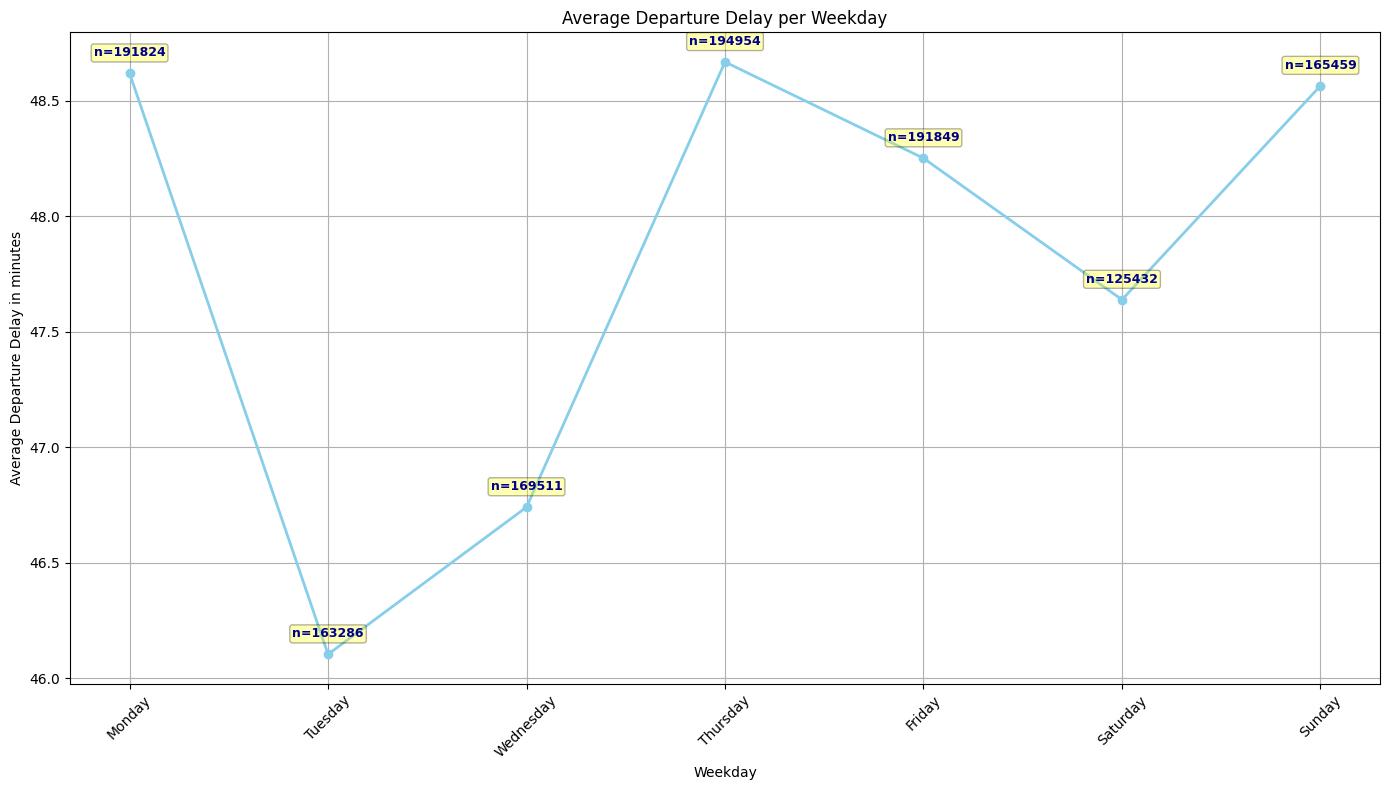

In [274]:
# Weekday mapping
week_map = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

# Calculate monthly delay
monthly_delay = df_cleaned2.groupby(df_cleaned2['FL_DATE'].dt.weekday)['DEP_DELAY'].mean()

# Calculate monthly flight counts
monthly_counts = df_cleaned2.groupby(df_cleaned2['FL_DATE'].dt.weekday).size()

# Plot
plt.figure(figsize=(14, 8))
line = monthly_delay.plot(kind='line', marker='o', color='skyblue', linestyle='-', linewidth=2)

# Add flight counts near each point
for month, delay in monthly_delay.items():
    count = monthly_counts[month]
    plt.annotate(f'n={count}', 
                 xy=(month, delay), 
                 xytext=(0, 10),  # 10 points vertical offset
                 textcoords='offset points',
                 ha='center', 
                 va='bottom',
                 fontweight='bold',
                 color='darkblue',
                 fontsize=9,
                 bbox=dict(boxstyle='round,pad=0.2', 
                           fc='yellow', 
                           alpha=0.3))

plt.title('Average Departure Delay per Weekday')
plt.xlabel('Weekday')
plt.ylabel('Average Departure Delay in minutes')

# Set x-ticks to weekday names
plt.xticks(list(week_map.keys()), [week_map[key] for key in week_map], rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()

### Delays by carrier

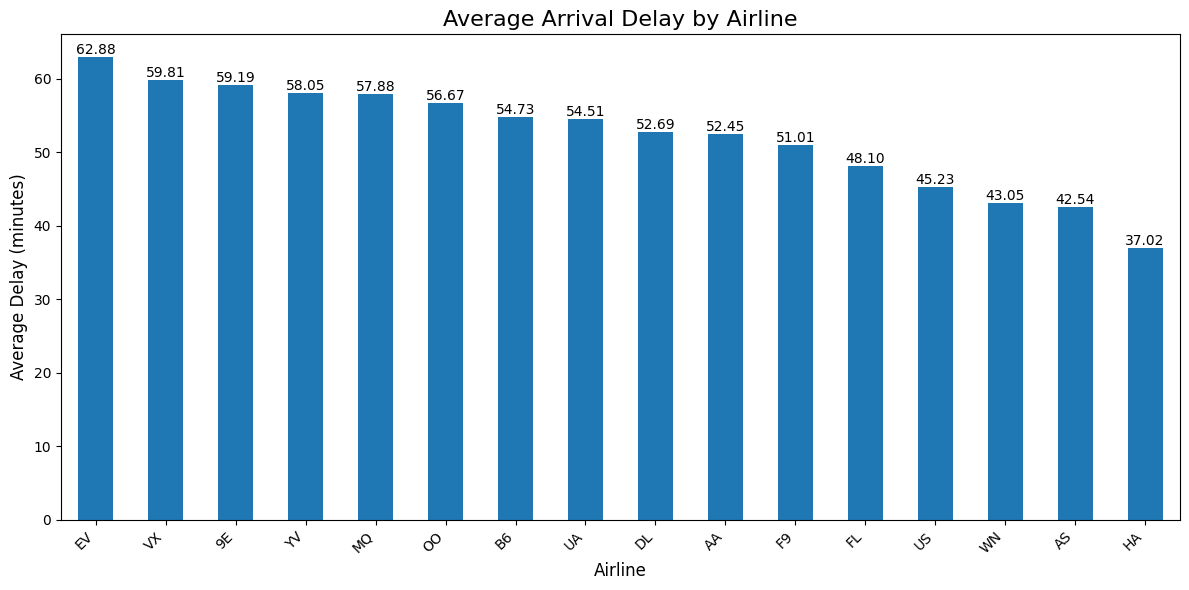

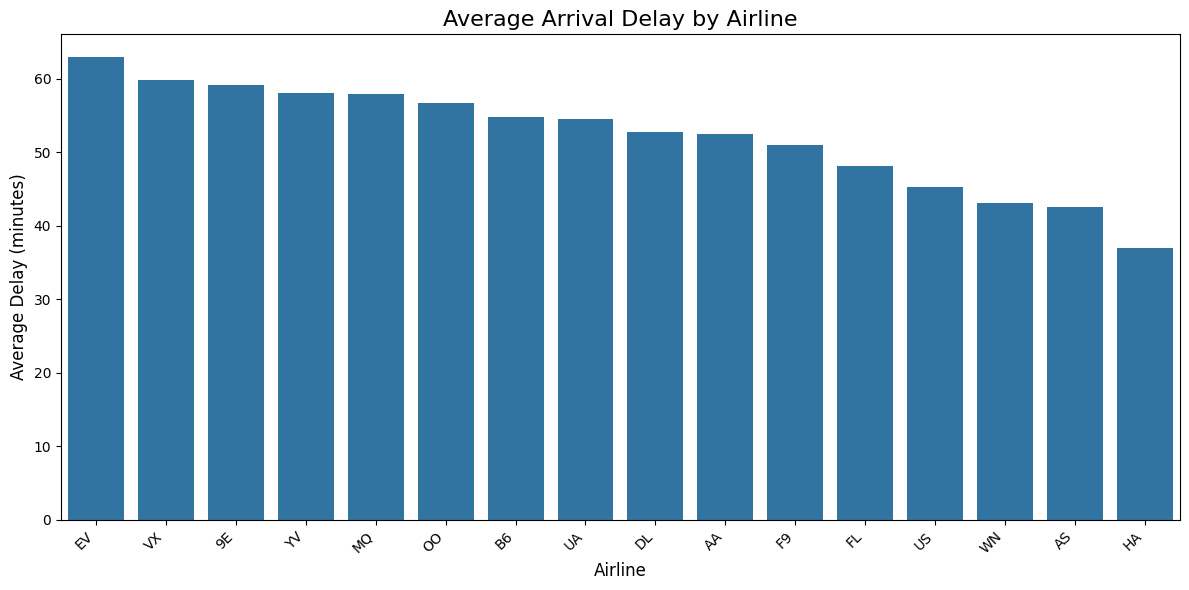

In [279]:
# Calculate average arrival delay by carrier
carrier_delays = df_cleaned2.groupby('OP_CARRIER')['ARR_DELAY'].mean().sort_values(ascending=False)

# Create the plot with improved styling
plt.figure(figsize=(12, 6))
carrier_delays.plot(kind='bar')
plt.title('Average Arrival Delay by Airline', fontsize=16)
plt.xlabel('Airline', fontsize=12)
plt.ylabel('Average Delay (minutes)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Optional: Add value labels on top of each bar
for i, v in enumerate(carrier_delays):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.show()

# Alternative with Seaborn for more styling options
plt.figure(figsize=(12, 6))
sns.barplot(x=carrier_delays.index, y=carrier_delays.values)
plt.title('Average Arrival Delay by Airline', fontsize=16)
plt.xlabel('Airline', fontsize=12)
plt.ylabel('Average Delay (minutes)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

From this graph, we can conclude that the highest delays are on Mondays, Thursdays, and Sundays. Thursdays also had the most flights (194954).

## Correlational analasys

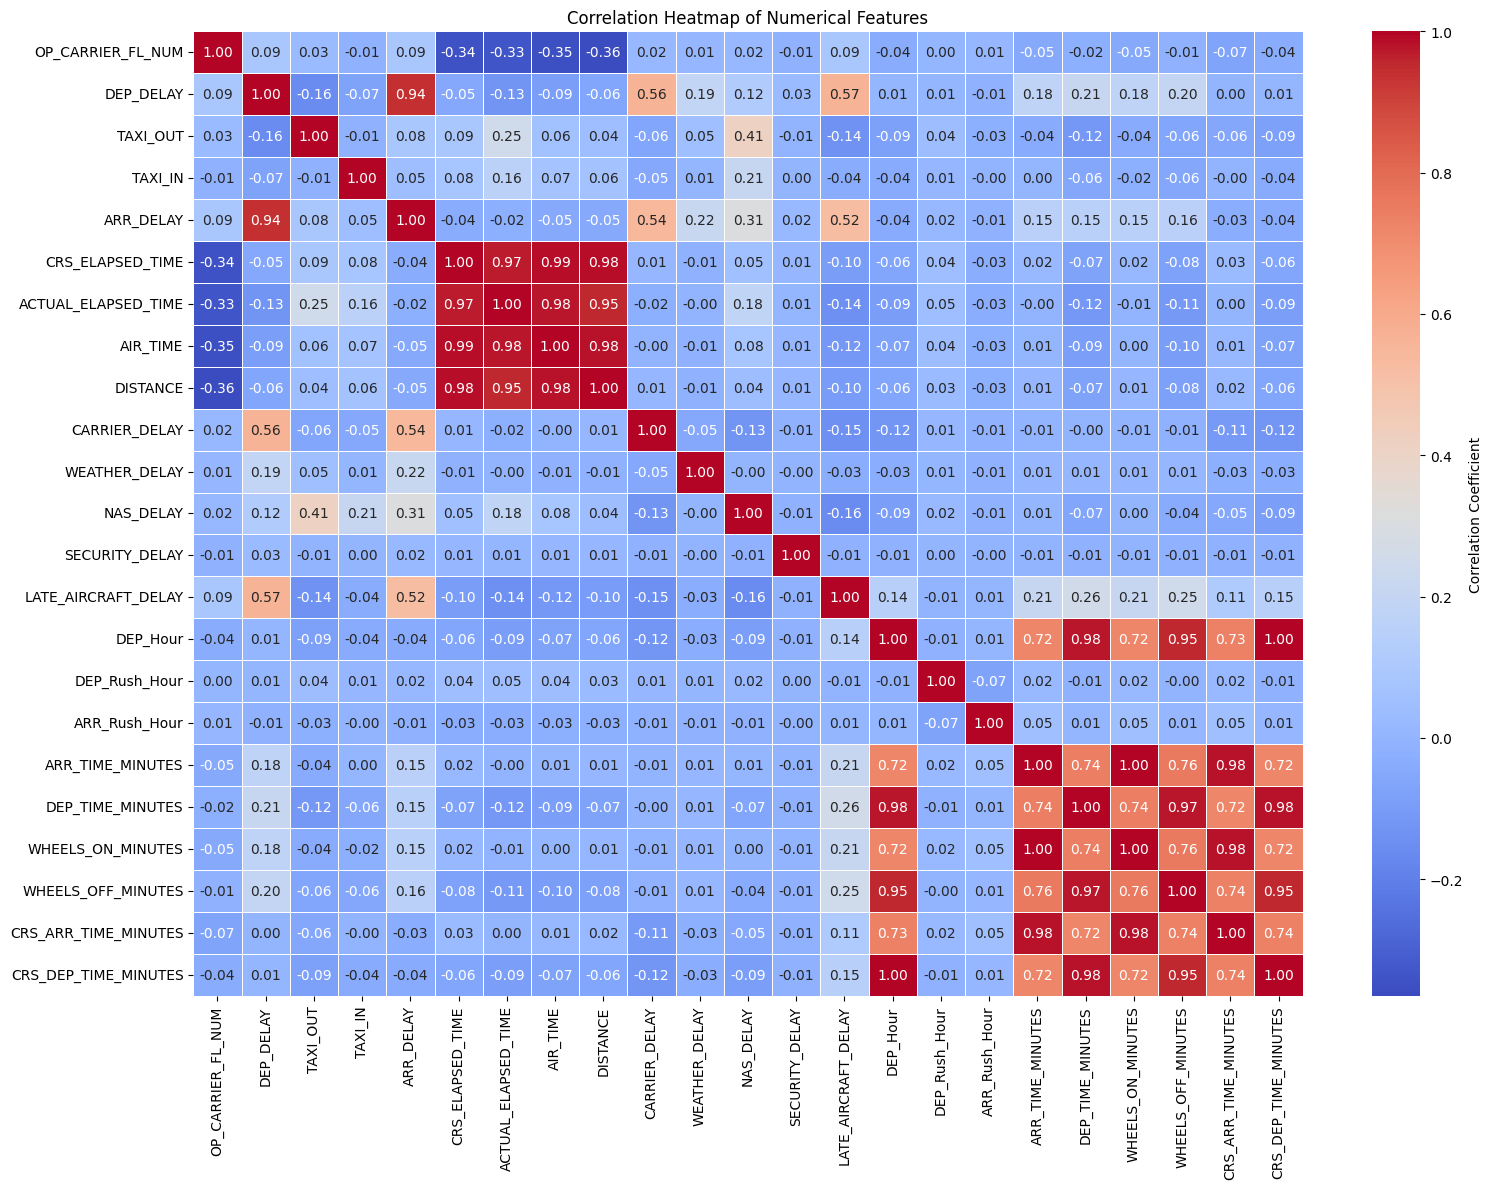

In [261]:
# Select only numerical columns

numerical_cols = df_cleaned2.select_dtypes(include=['int64', 'float64']).columns

# Compute correlation matrix
corr_matrix = df_cleaned2[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='coolwarm', 
            fmt=".2f", 
            linewidths=0.5,
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()